In [1]:
## load modules
import matplotlib.pyplot as plt
import os, time  
import numpy as np 
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
import matplotlib.pyplot as plt
import numpy as np

from keras.datasets import mnist
from keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten, Reshape
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.models import Sequential
from keras.optimizers import Adam
import numpy as np
from keras import layers, models
from keras.optimizers import Adam
from keras import layers, models
from keras.optimizers import Adam
from keras.layers import LeakyReLU,BatchNormalization
from keras.optimizers import RMSprop

from keras.models import Sequential

from keras.layers import Conv2D, Flatten, Dropout, Dense, UpSampling2D, Reshape,MaxPooling2D
from keras.layers import Conv2DTranspose, Activation, BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import RMSprop

os.environ["CUDA_VISIBLE_DEVICES"]="0";  


Using TensorFlow backend.
/home/xwang/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/xwang/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/xwang/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/xwang/.local/lib/python3.6/site-packages/tensorflow/python/fra

# **data precessing**

### **seting dir_data**

In [ ]:
dir_data = "/home/xwang/Code/Machine_Learning/Ass3/dataset/img_align_celeba"

### **spilt dataset to training samples and testing samples**

In [ ]:
#train_samples        = (202599 * 0.9) 
#testing_samples         = 100
train_samples = 200000
testing_samples = 2599

In [ ]:
all_image       = np.sort(os.listdir(dir_data))
## name of the jpg files for training set
nm_imgs_train = all_image[:train_samples]
## name of the jpg files for the testing data
nm_imgs_test  = all_image[train_samples:train_samples + testing_samples]
img_shape     = (32, 32, 3)

### **define function load  celeba raw image and convert to numpy arrray**

In [ ]:
def get_data(nm_imgs):
    X_train = []
    target_size = img_shape
    for i, myid in enumerate(nm_imgs):
        image = load_img(dir_data + "/" + myid,
                         target_size=img_shape[:2])
        image = img_to_array(image)/255.0
        X_train.append(image)
    X_train = np.array(X_train)
    return(X_train)

In [ ]:
X_train = get_data(nm_imgs_train)

X_test  = get_data(nm_imgs_test)

print(X_train.shape)
print(X_test.shape)

In [ ]:
# np.save('/home/xwang/Code/Machine_Learning/Ass3/dataset/celeba_train_x',X_train)
# np.save('/home/xwang/Code/Machine_Learning/Ass3/dataset/celeba_test_x',X_test)

In [2]:
X_train = np.load('/home/xwang/Code/Machine_Learning/Ass3/dataset/celeba_train_x.npy')
X_test = np.load('/home/xwang/Code/Machine_Learning/Ass3/dataset/celeba_test_x.npy')

In [3]:
print(X_train.shape)
print(X_test.shape)

(200000, 32, 32, 3)
(2599, 32, 32, 3)


### **load MNIST and Cifar10 dataset**

In [ ]:
from keras.datasets import mnist
from keras.datasets import cifar10

import cv2

#(X_train, _), (X_test, _) = mnist.load_data()
(X_train, y_train), (X_test,_) = cifar10.load_data()

In [ ]:
# this code just for one channel image convert to three channel
X_train = [cv2.cvtColor(cv2.resize(i,(32,32)), cv2.COLOR_GRAY2BGR) for i in X_train]
X_train = np.concatenate([arr[np.newaxis] for arr in X_train]).astype('float32')

X_test = [cv2.cvtColor(cv2.resize(i,(32,32)), cv2.COLOR_GRAY2BGR) for i in X_test]
X_test = np.concatenate([arr[np.newaxis] for arr in X_test]).astype('float32')
 

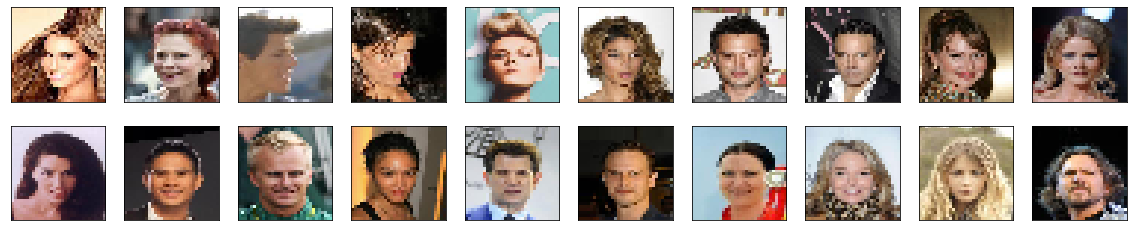

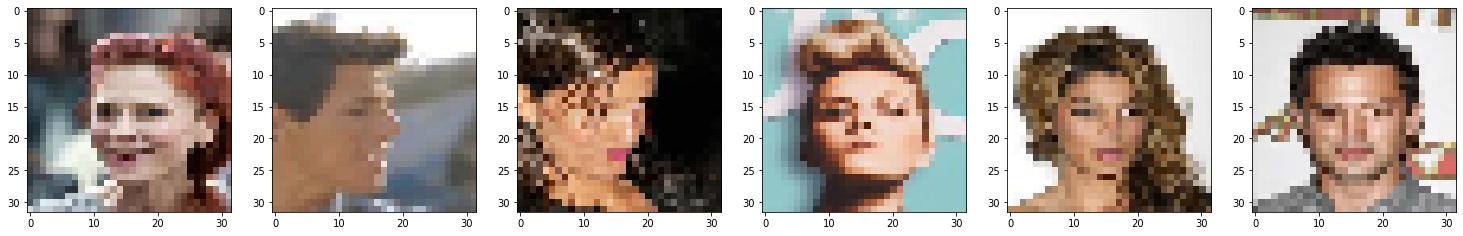

In [4]:
fig = plt.figure(figsize=(20,4))
num_img_plot = 20
for count in range(0,num_img_plot):
    ax = fig.add_subplot(2,num_img_plot/2,count+1,xticks=[], yticks=[])
    ax.imshow(X_train[count])
plt.show()
    
    
fig = plt.figure(figsize=(30,15))
plot_image = 7
for count in range(1,plot_image):
    ax = fig.add_subplot(1,plot_image,count)
    ax.imshow(X_train[count])
plt.show()

In [5]:
img_rows = 32
img_cols = 32
channels = 3

# Input image dimensions
img_shape = (img_rows, img_cols, channels)

# Size of the noise vector, used as input to the Generator
# Set the dimension of latent variables to be 100
z_dim = 100

## **Define Generator based on Sequential model**

In [ ]:

# sequential modle

dim = 8
depth = 64+64+64+64
dropout = 0.4
def build_generator(z_dim):
    '''
    z_dim       : the dimension of the input vector for the generator
    img_shape   : the dimension of the output
    '''
    generator = Sequential()
    generator.add(Dense(z_dim, input_dim=z_dim))
    generator.add(Dense(dim*dim*depth, input_dim=z_dim))
    generator.add(BatchNormalization(momentum=0.9))
    generator.add(Activation('relu'))
    generator.add(Reshape((dim, dim, depth)))
    generator.add(Dropout(dropout))
    
    generator.add(UpSampling2D())
    generator.add(Conv2DTranspose(int(depth/2), 5, padding='same'))
    generator.add(BatchNormalization(momentum=0.9))
    generator.add(Activation('relu'))

    generator.add(UpSampling2D())
    generator.add(Conv2DTranspose(int(depth/4), 5, padding='same'))
    generator.add(BatchNormalization(momentum=0.9))
    generator.add(Activation('relu'))

    generator.add(Conv2DTranspose(int(depth/8), 5, padding='same'))
    generator.add(BatchNormalization(momentum=0.9))
    generator.add(Activation('relu'))

    generator.add(Conv2DTranspose(3, 5, padding='same'))
    generator.add(Activation('sigmoid'))

    generator.summary() 
    return(generator)    


In [6]:

# functional modle

def build_generator(img_shape, noise_shape = (100,)):
    '''
    noise_shape : the dimension of the input vector for the generator
    img_shape   : the dimension of the output
    '''
    ## latent variable as input
    input_noise = layers.Input(shape=noise_shape) 
    d = layers.Dense(1024, activation="relu")(input_noise) 
    d = layers.Dense(1024, activation="relu")(input_noise) 
    d = layers.Dense(128*8*8, activation="relu")(d)
    d = layers.Reshape((8,8,128))(d)
    
    d = layers.Conv2DTranspose(128, kernel_size=(2,2) ,  strides=(2,2) , use_bias=False)(d)
    d = layers.Conv2D( 64  , ( 1 , 1 ) , activation='relu' , padding='same', name="block_4")(d) ## 16,16


    d = layers.Conv2DTranspose(32, kernel_size=(2,2) ,  strides=(2,2) , use_bias=False)(d)
    d = layers.Conv2D( 64  , ( 1 , 1 ) , activation='relu' , padding='same', name="block_5")(d) ## 32,32
    
    if img_shape[0] == 64:
        d = layers.Conv2DTranspose(32, kernel_size=(2,2) ,  strides=(2,2) , use_bias=False)(d)
        d = layers.Conv2D( 64  , ( 1 , 1 ) , activation='relu' , padding='same', name="block_6")(d) ## 64,64
    
    img = layers.Conv2D( 3 , ( 1 , 1 ) , activation='sigmoid' , padding='same', name="final_block")(d) ## 32, 32
    model = models.Model(input_noise, img)
    model.summary() 
    return(model)


### **compile Generator model**

In [7]:
## Set the dimension of latent variables to be 100
noise_shape = (100,)
optimizer = Adam(0.00007, 0.5)

generator = build_generator(img_shape, noise_shape = (100,))
#generator = build_generator(z_dim)

generator.compile(loss='binary_crossentropy', optimizer=optimizer)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              103424    
_________________________________________________________________
dense_3 (Dense)              (None, 8192)              8396800   
_________________________________________________________________
reshape_1 (Reshape)          (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 16, 16, 128)       65536     
_________________________________________________________________
block_4 (Conv2D)             (None, 16, 16, 64)        8256      
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 32, 32, 32)        8192

## **Define Discriminator based on Sequential model**


In [ ]:

def build_discriminator(img_shape,noutput=1):
    depth =64
    dropout = 0.4
    discriminator = Sequential()

    input_shape = (32, 32, 3)

    discriminator.add(Conv2D(depth*1, 5, strides=1, 
                             input_shape=img_shape,padding='same'))
    discriminator.add(LeakyReLU(alpha=0.2))
    discriminator.add(Dropout(dropout))

    discriminator.add(Conv2D(depth*2, 5, strides=2, padding='same'))
    discriminator.add(LeakyReLU(alpha=0.2))
    discriminator.add(Dropout(dropout))

    discriminator.add(Conv2D(depth*4, 5, strides=2, padding='same'))
    discriminator.add(LeakyReLU(alpha=0.2))
    discriminator.add(Dropout(dropout))

    discriminator.add(Conv2D(depth*8, 5, strides=1, padding='same'))
    discriminator.add(LeakyReLU(alpha=0.2))
    discriminator.add(Dropout(dropout))

    discriminator.add(Flatten())
    discriminator.add(Dense(1000))
    discriminator.add(Dense(noutput))
    discriminator.add(Activation('sigmoid'))

    discriminator.summary()
   
    return (discriminator)


In [8]:
# functional model

def build_discriminator(img_shape,noutput):
    input_img = layers.Input(shape=img_shape)
    
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same', name='block1_conv1')(input_img)
    x = layers.Dropout(0.4)(x)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
    x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)
    
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
    x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)
    
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
    x = layers.Dropout(0.6)(x)
    x = layers.MaxPooling2D((2, 2), strides=(1, 1), name='block4_pool')(x)

    
    x         = layers.Flatten()(x)
    x         = layers.Dense(1024,      activation="relu")(x)
    out       = layers.Dense(noutput,   activation='sigmoid')(x)
    model     = models.Model(input_img, out)
    
    return model




### **Compile discriminator model**

In [9]:
discriminator  = build_discriminator(img_shape,noutput=1)
discriminator.compile(loss      = 'binary_crossentropy', 
                      optimizer = optimizer,
                      metrics   = ['accuracy'])

discriminator.summary()


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 32)        9248      
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 32)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0  

### **using function to define adversarial/gan model**

In [10]:
def build_gan(generator, discriminator):

    model = Sequential()

    # Combined Generator -> Discriminator model
    model.add(generator)
    model.add(discriminator)

    return model

In [11]:
print(img_shape)
#print(noise_shape.shape)

(32, 32, 3)


**Import step : Keep Discriminator’s parameters constant for Generator training because we just want to updata generator in the initialize step**

**For the adversarial_model we will only train the generator**

In [12]:
discriminator.trainable = False

**The adversarial_model (stacked generator and discriminator) takes noise(z_dim) as input => generates images => determines validity** 

In [13]:
# Build the discriminator 
#discriminator = build_discriminator(img_shape)

# Build the Generator
#generator = build_generator(noise_shape)

# Build and compile GAN model with fixed Discriminator to train the Generator
adversarial_model = build_gan(generator, discriminator)
#optimizer = RMSprop(lr=0.0004, clipvalue=1.0, decay=3e-8)
optimizer = Adam(0.00007, 0.5)

adversarial_model.compile(loss='binary_crossentropy', 
                          optimizer=optimizer,
                          metrics=['accuracy'])
adversarial_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_1 (Model)              (None, 32, 32, 3)         8584515   
_________________________________________________________________
model_2 (Model)              (None, 1)                 6711585   
Total params: 15,296,100
Trainable params: 8,584,515
Non-trainable params: 6,711,585
_________________________________________________________________


### **Define adversarial_model and compile**

In [ ]:
optimizer = RMSprop(lr=0.0004, clipvalue=1.0, decay=3e-8)
discriminator.trainable = False
adversarial_model = Sequential()
adversarial_model.add(generator)
adversarial_model.add(discriminator)

adversarial_model.compile(loss='binary_crossentropy', 
                          optimizer=optimizer,
                          metrics=['accuracy'])
adversarial_model.summary()

In [ ]:
z = layers.Input(shape=noise_shape)
img = generator(z)

# For the combined model we will only train the generator
discriminator.trainable = False

# The valid takes generated images as input and determines validity
valid = discriminator(img)

# The combined model  (stacked generator and discriminator) takes
# noise as input => generates images => determines validity 
adversarial_model = models.Model(z, valid)
adversarial_model.compile(loss='binary_crossentropy', optimizer=optimizer)
adversarial_model.summary()

### **Define get_noise function. In other words this function aims to create random noise, which as an input to generator so it is very import step**

**noise_sample = 128 that's means according to np.random.normal() it can create a Normally distributed data with (128,100) shape**

In [14]:
def get_noise(noise_sample, nlatent_dim=z_dim):
    noise = np.random.normal(0, 1, size = [noise_sample,nlatent_dim])
    return(noise)

### **Define plot images function**

In [15]:
def plot_generated_images(noise,path_save=None,titleadd=""):
    imgs = generator.predict(noise)
    fig = plt.figure(figsize=(20,4))
    #nplot = 20
    for i, img in enumerate(imgs):
        ax = fig.add_subplot(2,nsample/2,i+1,xticks=[], yticks=[])
        ax.imshow(img)
    fig.suptitle("Generated images "+titleadd,fontsize=30)
    
    if path_save is not None:
        plt.savefig(path_save,
                    bbox_inches='tight',
                    pad_inches=0)
        plt.close()
    else:
        plt.show()

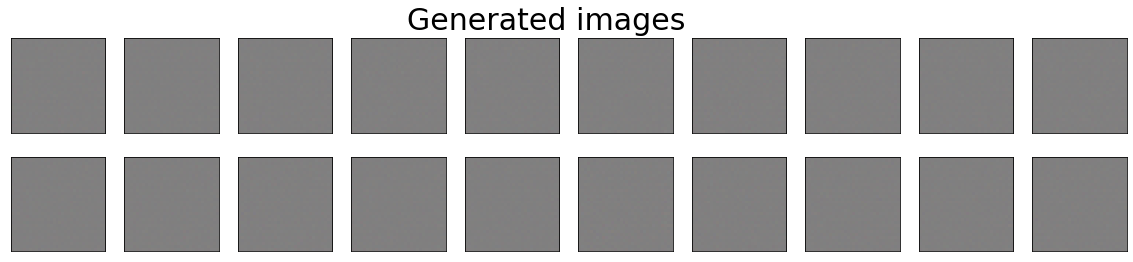

In [16]:
nsample = 20
noise = get_noise(noise_sample=nsample, nlatent_dim=z_dim)
plot_generated_images(noise)


In [17]:
print(noise)
print(noise.shape)

[[-1.60082283 -0.3456057   0.10886529 ... -1.06889491  0.72316728
  -1.02779691]
 [ 0.80154523  0.50445745  0.19781469 ... -0.99226944  1.62856919
   0.40303875]
 [-0.06275452  0.24982171  0.18754255 ...  2.62690975  0.39718148
  -0.83138312]
 ...
 [-2.17971813  0.71638004 -1.47583025 ... -0.26872967  1.47699206
  -0.25639953]
 [ 0.95480853 -0.65238239  0.0729395  ...  0.3253281   0.82627149
  -0.09456496]
 [-2.00567139  0.44802201 -0.46801268 ... -2.06009586  2.44507366
  -1.76902294]]
(20, 100)


# **Train adversraial model**

In [18]:

def train(models, X_train,dir_result, epochs=100000, batch_size=128):
        '''
        models     : tuple containins three tensors, (combined, discriminator, generator)
        X_train    : np.array containing images (Nsample, height, width, Nchannels)
        noise_plot : np.array of size (Nrandom_sample_to_plot, hidden unit length)
        dir_result : the location where the generated plots for noise_plot are saved 
        
        '''
        adversarial_model, discriminator, generator = models
        
        nlatent_dim = 100 #z_dim 100
        #nlatent_dim = noise.shape[1] 
        half_batch  = int(batch_size / 2)
        history = []
        
        discriminator_losses = []
        adversarial_losses = []
        sample_images = []
        
        for epoch in range(epochs):

            # ---------------------
            #  Train Discriminator
            # ---------------------

            # Select a random half batch of images . Select a random sample from the training data
            # X_train.shape[0] == 20000 so idx == (0,2000,64)
            # that's mean idx is a sequence from 0-20000 
            # random select 64 X_train images from real dataset 
            # images_train shape(half_batch,32,32,3)
            idx = np.random.randint(0, X_train.shape[0], half_batch)
            images_train = X_train[idx]
            
            # get noise . shape is (64,100) as input to generator
            noise = get_noise(half_batch, nlatent_dim)
             # Generate a half batch of new images --- this step is get fake image from noise
            gen_imgs = generator.predict(noise)

            
            # Train the discriminator q: better to mix them together?
            
            # set real_label (64,1) all label is one 
            # set fake lagel (64,1) all label is zero
            real_label = np.ones((half_batch,1),dtype=float)
            fake_label = np.zeros((half_batch,1),dtype=float)
            
            # it will return [a,b] eg.[0.40708494, 0.859375]
            # d_loss_fake : [a,b] eg. [0.14939848, 0.984375]
            d_loss_real = discriminator.train_on_batch(images_train,real_label)
            d_loss_fake = discriminator.train_on_batch(gen_imgs, fake_label)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)


            # ---------------------
            #  Train Generator
            # ---------------------

            # noise shpae (128,100) all of batch_size used to 
            # train adversraial_model(actually in other words is train generator because in 
            # adversarial_model discriminator is fixed and just generator need to train and update )
            #  this noise (128,100)
            noise_whole_batch_size = get_noise(batch_size, nlatent_dim)

            # The generator wants the discriminator to label the generated samples
            # as valid (ones) (128,) ====> (128,1)
            valid_y = np.array([1] * batch_size)
            valid_y = valid_y.reshape(batch_size,1)
            
            # Train the generator
            # g_loss [0.29064804, 0.984375]
            g_loss = adversarial_model.train_on_batch(noise_whole_batch_size, valid_y)

            history.append({"D":d_loss[0],"G":g_loss})
            
            discriminator_losses.append(d_loss)
            adversarial_losses.append(g_loss)
            
            # every 100 epoch select one sample_images (fake_images[0], (32,32,3))
            if epoch % 100 == 0:
                
                # noise shape(128,100) value range from (-1.0,1.0)
                #noise = np.random.uniform(-1.0, 1.0, size=[batch_size, 100])
                fake_images = generator.predict(noise_whole_batch_size)
                sample_images.append(fake_images[0])
            
            if epoch % 100 == 0:
                print('====')
                # Plot the progress
                print ("Epoch {} [D loss: {}, acc.: {}%] [G loss: {}]".format(
                    epoch, d_loss[0], 100*d_loss[1], g_loss))
                               # Plot the progress
#                 print (" %05.0f [D loss: %4.3f, acc.: %.2f%%] [G loss: %4.3f]" % (
#                     epoch, d_loss[0], 100*d_loss[1], g_loss))

            if epoch % int(epochs/100) == 0:
                plot_generated_images(noise[0:20,:],
                                      path_save=dir_result+"/image_{}.png".format(epoch),
                                      titleadd="Epoch {}".format(epoch))
                
            if epoch % 1000 == 0:
                plot_generated_images(noise[0:20,:],
                                      titleadd="Epoch {}".format(epoch))
                        
        return (history,discriminator_losses, adversarial_losses, sample_images)



/home/xwang/.local/lib/python3.6/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/home/xwang/.local/lib/python3.6/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


====
Epoch 0 [D loss: 0.9444049596786499, acc.: 35.25390625%] [G loss: [0.4965798, 1.0]]


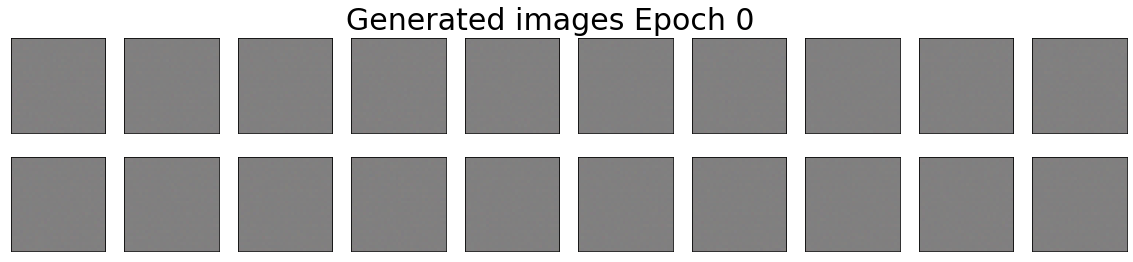

/home/xwang/.local/lib/python3.6/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


====
Epoch 100 [D loss: 0.2694690227508545, acc.: 93.9453125%] [G loss: [2.3562293, 0.0]]
====
Epoch 200 [D loss: 0.1007300615310669, acc.: 98.73046875%] [G loss: [2.922914, 0.0009765625]]
====
Epoch 300 [D loss: 0.08401715010404587, acc.: 97.0703125%] [G loss: [4.33979, 0.005859375]]
====
Epoch 400 [D loss: 0.15620754659175873, acc.: 95.3125%] [G loss: [3.4069436, 0.0009765625]]
====
Epoch 500 [D loss: 0.11653704196214676, acc.: 96.6796875%] [G loss: [3.5066295, 0.0009765625]]
====
Epoch 600 [D loss: 0.16168828308582306, acc.: 94.7265625%] [G loss: [4.4574056, 0.0]]
====
Epoch 700 [D loss: 0.039176587015390396, acc.: 98.73046875%] [G loss: [3.964385, 0.00390625]]
====
Epoch 800 [D loss: 0.05702310800552368, acc.: 98.73046875%] [G loss: [3.6368117, 0.0]]
====
Epoch 900 [D loss: 0.08964855968952179, acc.: 97.75390625%] [G loss: [5.5622845, 0.0]]
====
Epoch 1000 [D loss: 0.21844568848609924, acc.: 92.67578125%] [G loss: [2.7855086, 0.00390625]]


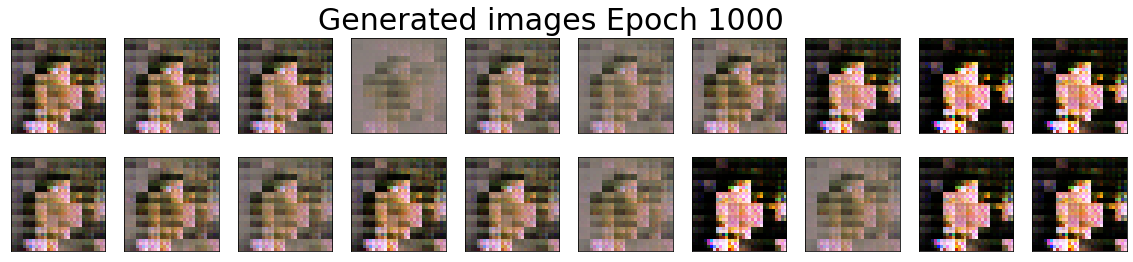

====
Epoch 1100 [D loss: 0.1556548923254013, acc.: 94.62890625%] [G loss: [3.6926546, 0.001953125]]
====
Epoch 1200 [D loss: 0.17875902354717255, acc.: 93.75%] [G loss: [3.5159743, 0.0]]
====
Epoch 1300 [D loss: 0.05390128493309021, acc.: 98.046875%] [G loss: [4.478325, 0.0]]
====
Epoch 1400 [D loss: 0.1238008514046669, acc.: 95.703125%] [G loss: [3.4116468, 0.015625]]
====
Epoch 1500 [D loss: 0.07973629236221313, acc.: 97.55859375%] [G loss: [4.253337, 0.0029296875]]
====
Epoch 1600 [D loss: 0.1315426081418991, acc.: 95.5078125%] [G loss: [4.5406923, 0.001953125]]
====
Epoch 1700 [D loss: 0.23781752586364746, acc.: 90.91796875%] [G loss: [2.957826, 0.0029296875]]
====
Epoch 1800 [D loss: 0.19176605343818665, acc.: 92.578125%] [G loss: [3.5355988, 0.005859375]]
====
Epoch 1900 [D loss: 0.22505687177181244, acc.: 91.6015625%] [G loss: [3.6151907, 0.0009765625]]
====
Epoch 2000 [D loss: 0.18126094341278076, acc.: 93.26171875%] [G loss: [2.9089136, 0.005859375]]


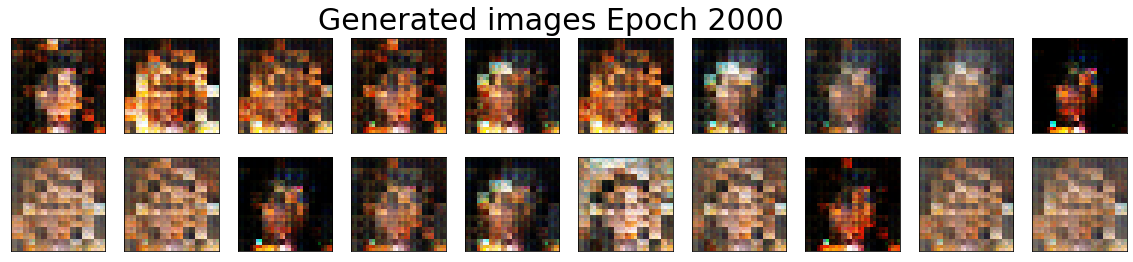

====
Epoch 2100 [D loss: 0.20456983149051666, acc.: 92.67578125%] [G loss: [3.6524997, 0.0087890625]]
====
Epoch 2200 [D loss: 0.2612556219100952, acc.: 89.0625%] [G loss: [2.8681169, 0.005859375]]
====
Epoch 2300 [D loss: 0.3367522358894348, acc.: 86.328125%] [G loss: [2.9462714, 0.0048828125]]
====
Epoch 2400 [D loss: 0.301492303609848, acc.: 88.18359375%] [G loss: [2.4322822, 0.017578125]]
====
Epoch 2500 [D loss: 0.32870545983314514, acc.: 85.44921875%] [G loss: [2.6808271, 0.0126953125]]
====
Epoch 2600 [D loss: 0.3256024122238159, acc.: 86.42578125%] [G loss: [2.576134, 0.021484375]]
====
Epoch 2700 [D loss: 0.3621060848236084, acc.: 85.546875%] [G loss: [2.126161, 0.024414062]]
====
Epoch 2800 [D loss: 0.3012176752090454, acc.: 88.4765625%] [G loss: [2.4703157, 0.017578125]]
====
Epoch 2900 [D loss: 0.41788148880004883, acc.: 81.15234375%] [G loss: [2.2644775, 0.016601562]]
====
Epoch 3000 [D loss: 0.3628121018409729, acc.: 84.47265625%] [G loss: [2.051053, 0.044921875]]


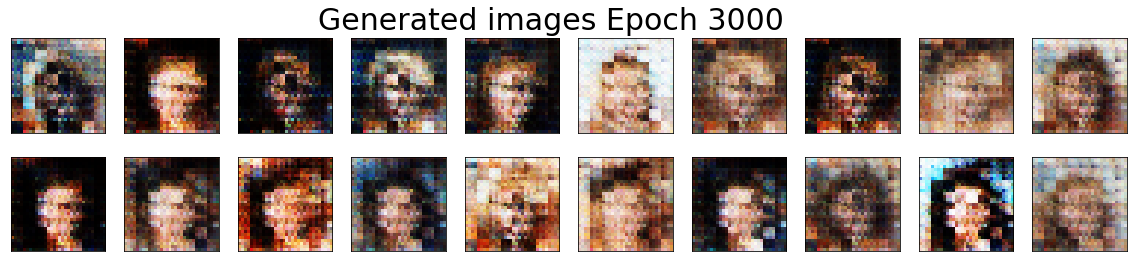

====
Epoch 3100 [D loss: 0.4245563745498657, acc.: 81.34765625%] [G loss: [1.7546028, 0.04296875]]
====
Epoch 3200 [D loss: 0.5503169894218445, acc.: 70.21484375%] [G loss: [1.7216116, 0.0703125]]
====
Epoch 3300 [D loss: 0.46622419357299805, acc.: 79.1015625%] [G loss: [1.7756877, 0.059570312]]
====
Epoch 3400 [D loss: 0.4610416889190674, acc.: 79.1015625%] [G loss: [1.4938114, 0.072265625]]
====
Epoch 3500 [D loss: 0.4795924425125122, acc.: 77.63671875%] [G loss: [1.501286, 0.06640625]]
====
Epoch 3600 [D loss: 0.5045705437660217, acc.: 74.70703125%] [G loss: [1.7908471, 0.045898438]]
====
Epoch 3700 [D loss: 0.48973697423934937, acc.: 76.66015625%] [G loss: [1.6233964, 0.06542969]]
====
Epoch 3800 [D loss: 0.5650991201400757, acc.: 69.82421875%] [G loss: [1.4990242, 0.064453125]]
====
Epoch 3900 [D loss: 0.5043585896492004, acc.: 74.90234375%] [G loss: [1.4692246, 0.08203125]]
====
Epoch 4000 [D loss: 0.5248355865478516, acc.: 72.55859375%] [G loss: [1.4900945, 0.061523438]]


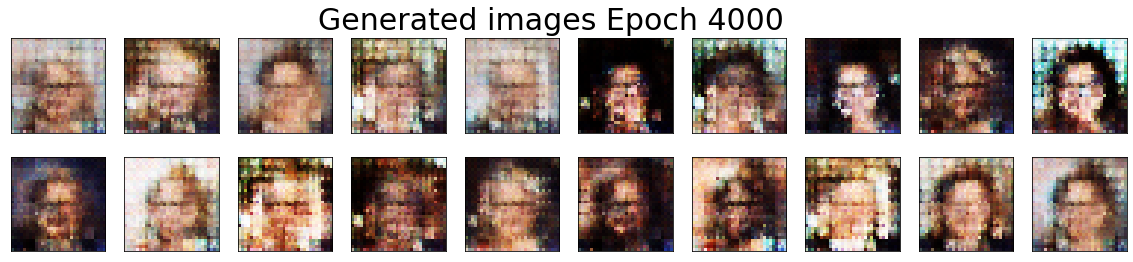

====
Epoch 4100 [D loss: 0.4918345510959625, acc.: 75.5859375%] [G loss: [1.4924719, 0.07519531]]
====
Epoch 4200 [D loss: 0.5125002861022949, acc.: 74.31640625%] [G loss: [1.5097362, 0.06738281]]
====
Epoch 4300 [D loss: 0.5344103574752808, acc.: 72.4609375%] [G loss: [1.3143075, 0.08984375]]
====
Epoch 4400 [D loss: 0.46607163548469543, acc.: 79.39453125%] [G loss: [1.5257735, 0.0703125]]
====
Epoch 4500 [D loss: 0.5073341131210327, acc.: 74.0234375%] [G loss: [1.5090585, 0.07714844]]
====
Epoch 4600 [D loss: 0.5094590187072754, acc.: 75.29296875%] [G loss: [1.3875173, 0.07128906]]
====
Epoch 4700 [D loss: 0.5100123882293701, acc.: 74.609375%] [G loss: [1.4885361, 0.07714844]]
====
Epoch 4800 [D loss: 0.5096275806427002, acc.: 74.31640625%] [G loss: [1.4670907, 0.06640625]]
====
Epoch 4900 [D loss: 0.4839839041233063, acc.: 75.1953125%] [G loss: [1.4290392, 0.06542969]]
====
Epoch 5000 [D loss: 0.522304356098175, acc.: 73.33984375%] [G loss: [1.3048605, 0.08203125]]


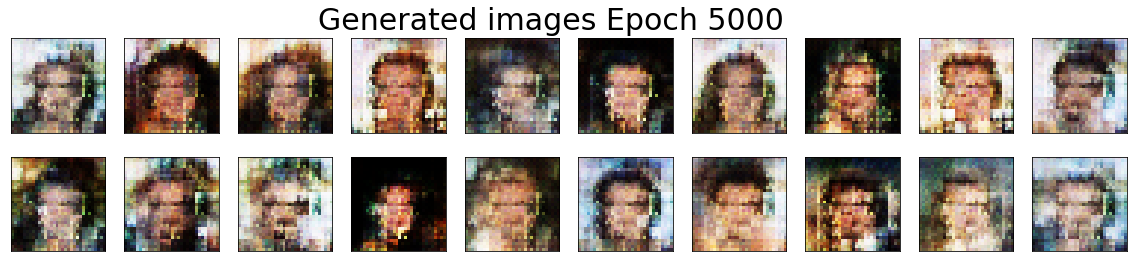

====
Epoch 5100 [D loss: 0.48525166511535645, acc.: 76.26953125%] [G loss: [1.4570961, 0.06347656]]
====
Epoch 5200 [D loss: 0.4878315031528473, acc.: 75.390625%] [G loss: [1.4393213, 0.068359375]]
====
Epoch 5300 [D loss: 0.5610306262969971, acc.: 70.41015625%] [G loss: [1.5273407, 0.06542969]]
====
Epoch 5400 [D loss: 0.5147511959075928, acc.: 73.4375%] [G loss: [1.3417022, 0.076171875]]
====
Epoch 5500 [D loss: 0.5266106128692627, acc.: 73.828125%] [G loss: [1.3116714, 0.080078125]]
====
Epoch 5600 [D loss: 0.5275294780731201, acc.: 71.58203125%] [G loss: [1.3013659, 0.07519531]]
====
Epoch 5700 [D loss: 0.5383148193359375, acc.: 71.484375%] [G loss: [1.259415, 0.087890625]]
====
Epoch 5800 [D loss: 0.5182633996009827, acc.: 72.75390625%] [G loss: [1.4022195, 0.07714844]]
====
Epoch 5900 [D loss: 0.5226141214370728, acc.: 73.828125%] [G loss: [1.2875823, 0.08203125]]
====
Epoch 6000 [D loss: 0.5476775765419006, acc.: 71.19140625%] [G loss: [1.2320815, 0.09082031]]


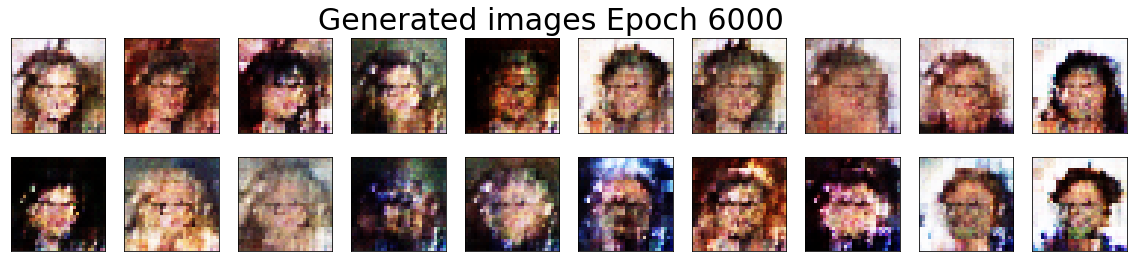

====
Epoch 6100 [D loss: 0.5319055318832397, acc.: 71.875%] [G loss: [1.2673761, 0.056640625]]
====
Epoch 6200 [D loss: 0.5602967739105225, acc.: 69.82421875%] [G loss: [1.2233078, 0.10253906]]
====
Epoch 6300 [D loss: 0.5560596585273743, acc.: 70.99609375%] [G loss: [1.2405175, 0.09277344]]
====
Epoch 6400 [D loss: 0.5339446067810059, acc.: 73.046875%] [G loss: [1.2075733, 0.09765625]]
====
Epoch 6500 [D loss: 0.5918174982070923, acc.: 67.96875%] [G loss: [1.2128378, 0.09863281]]
====
Epoch 6600 [D loss: 0.5505474805831909, acc.: 71.484375%] [G loss: [1.1980314, 0.0859375]]
====
Epoch 6700 [D loss: 0.5414221286773682, acc.: 70.60546875%] [G loss: [1.1958959, 0.08203125]]
====
Epoch 6800 [D loss: 0.5727372169494629, acc.: 67.67578125%] [G loss: [1.1942879, 0.083984375]]
====
Epoch 6900 [D loss: 0.5760374069213867, acc.: 66.69921875%] [G loss: [1.130938, 0.123046875]]
====
Epoch 7000 [D loss: 0.5626367330551147, acc.: 71.58203125%] [G loss: [1.0904455, 0.08984375]]


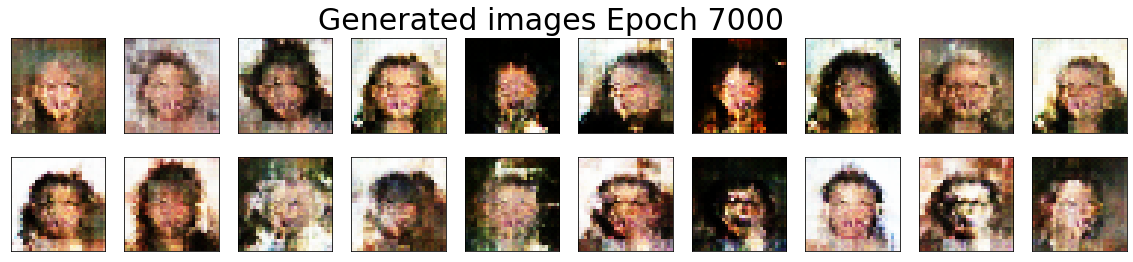

====
Epoch 7100 [D loss: 0.5731551051139832, acc.: 68.9453125%] [G loss: [1.1398951, 0.10449219]]
====
Epoch 7200 [D loss: 0.5764151811599731, acc.: 68.5546875%] [G loss: [1.1796925, 0.0703125]]
====
Epoch 7300 [D loss: 0.5842396020889282, acc.: 66.50390625%] [G loss: [1.0874672, 0.099609375]]
====
Epoch 7400 [D loss: 0.552095353603363, acc.: 71.875%] [G loss: [1.1668835, 0.08105469]]
====
Epoch 7500 [D loss: 0.551766037940979, acc.: 72.36328125%] [G loss: [1.1168374, 0.09375]]
====
Epoch 7600 [D loss: 0.6283347606658936, acc.: 62.20703125%] [G loss: [1.0827122, 0.09765625]]
====
Epoch 7700 [D loss: 0.603943943977356, acc.: 65.33203125%] [G loss: [1.0817826, 0.09765625]]
====
Epoch 7800 [D loss: 0.6233749389648438, acc.: 63.37890625%] [G loss: [1.1137152, 0.07324219]]
====
Epoch 7900 [D loss: 0.5542317628860474, acc.: 69.53125%] [G loss: [1.199299, 0.080078125]]
====
Epoch 8000 [D loss: 0.574373722076416, acc.: 70.21484375%] [G loss: [1.1679727, 0.08496094]]


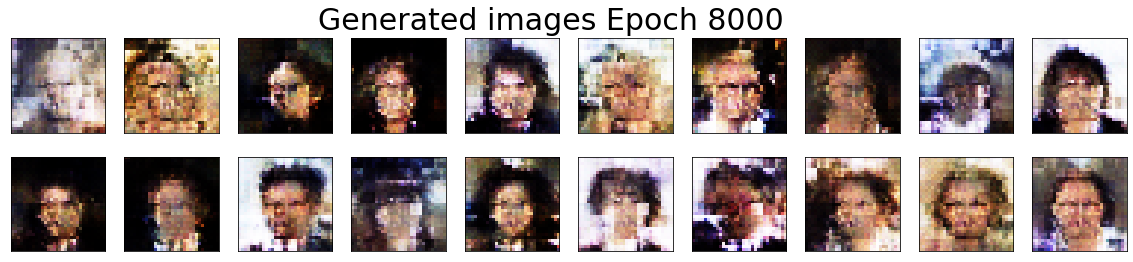

====
Epoch 8100 [D loss: 0.573015570640564, acc.: 69.04296875%] [G loss: [1.0641074, 0.099609375]]
====
Epoch 8200 [D loss: 0.5438876152038574, acc.: 71.19140625%] [G loss: [1.1201932, 0.087890625]]
====
Epoch 8300 [D loss: 0.6064654588699341, acc.: 64.84375%] [G loss: [1.1091955, 0.111328125]]
====
Epoch 8400 [D loss: 0.5699508786201477, acc.: 67.7734375%] [G loss: [1.1440552, 0.091796875]]
====
Epoch 8500 [D loss: 0.5765559077262878, acc.: 68.5546875%] [G loss: [1.1247232, 0.07910156]]
====
Epoch 8600 [D loss: 0.5736801624298096, acc.: 69.43359375%] [G loss: [1.0615548, 0.11230469]]
====
Epoch 8700 [D loss: 0.5845440030097961, acc.: 66.9921875%] [G loss: [1.098664, 0.099609375]]
====
Epoch 8800 [D loss: 0.5535053014755249, acc.: 69.23828125%] [G loss: [1.1289915, 0.083984375]]
====
Epoch 8900 [D loss: 0.6019061803817749, acc.: 67.1875%] [G loss: [1.1735314, 0.095703125]]
====
Epoch 9000 [D loss: 0.559073805809021, acc.: 69.53125%] [G loss: [1.0600271, 0.11035156]]


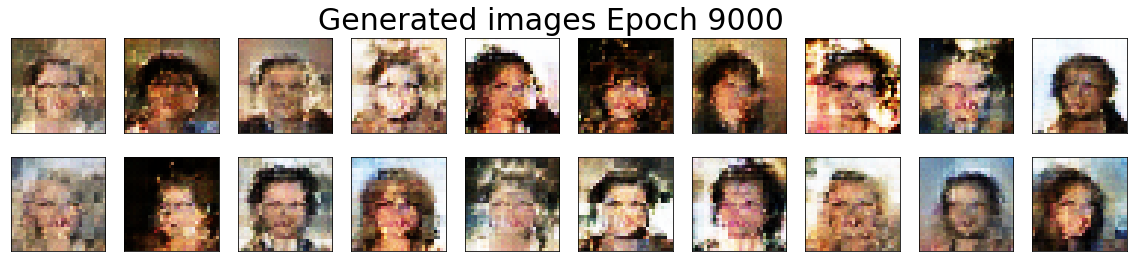

====
Epoch 9100 [D loss: 0.5761353969573975, acc.: 69.140625%] [G loss: [1.1186833, 0.08300781]]
====
Epoch 9200 [D loss: 0.5768783092498779, acc.: 67.96875%] [G loss: [1.0657918, 0.099609375]]
====
Epoch 9300 [D loss: 0.5912536382675171, acc.: 68.1640625%] [G loss: [1.121454, 0.09277344]]
====
Epoch 9400 [D loss: 0.5719920992851257, acc.: 69.23828125%] [G loss: [1.1370432, 0.083984375]]
====
Epoch 9500 [D loss: 0.5667449831962585, acc.: 68.9453125%] [G loss: [1.1266496, 0.11621094]]
====
Epoch 9600 [D loss: 0.5942080616950989, acc.: 66.2109375%] [G loss: [1.0549657, 0.09765625]]
====
Epoch 9700 [D loss: 0.549228310585022, acc.: 71.58203125%] [G loss: [1.1022012, 0.099609375]]
====
Epoch 9800 [D loss: 0.5876255035400391, acc.: 66.50390625%] [G loss: [1.1532139, 0.07324219]]
====
Epoch 9900 [D loss: 0.5770152807235718, acc.: 68.45703125%] [G loss: [1.1117641, 0.087890625]]
====
Epoch 10000 [D loss: 0.5707319974899292, acc.: 68.359375%] [G loss: [1.0992625, 0.061523438]]


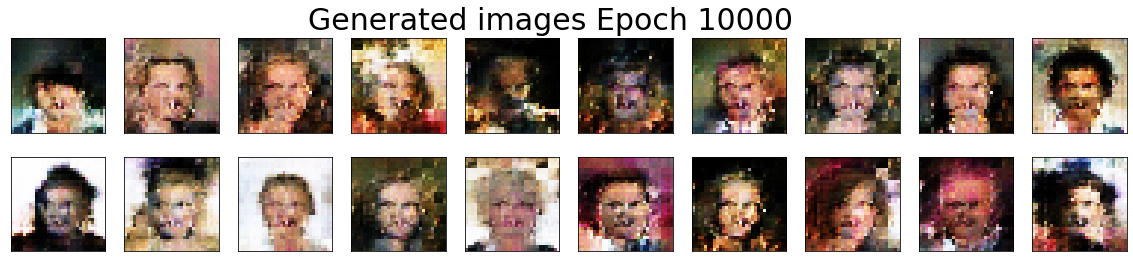

====
Epoch 10100 [D loss: 0.5665332078933716, acc.: 69.43359375%] [G loss: [1.086131, 0.1015625]]
====
Epoch 10200 [D loss: 0.5731260776519775, acc.: 67.48046875%] [G loss: [1.1094847, 0.09375]]
====
Epoch 10300 [D loss: 0.5921485424041748, acc.: 67.67578125%] [G loss: [1.0937243, 0.087890625]]
====
Epoch 10400 [D loss: 0.5844751000404358, acc.: 68.75%] [G loss: [1.0499408, 0.11621094]]
====
Epoch 10500 [D loss: 0.5802788734436035, acc.: 67.67578125%] [G loss: [1.0975828, 0.076171875]]
====
Epoch 10600 [D loss: 0.5833236575126648, acc.: 68.75%] [G loss: [1.0434008, 0.091796875]]
====
Epoch 10700 [D loss: 0.5595211982727051, acc.: 70.01953125%] [G loss: [1.0526414, 0.111328125]]
====
Epoch 10800 [D loss: 0.5648596286773682, acc.: 69.921875%] [G loss: [1.0910709, 0.07519531]]
====
Epoch 10900 [D loss: 0.5768858790397644, acc.: 69.3359375%] [G loss: [1.031283, 0.10839844]]
====
Epoch 11000 [D loss: 0.5708398818969727, acc.: 68.5546875%] [G loss: [1.0710227, 0.091796875]]


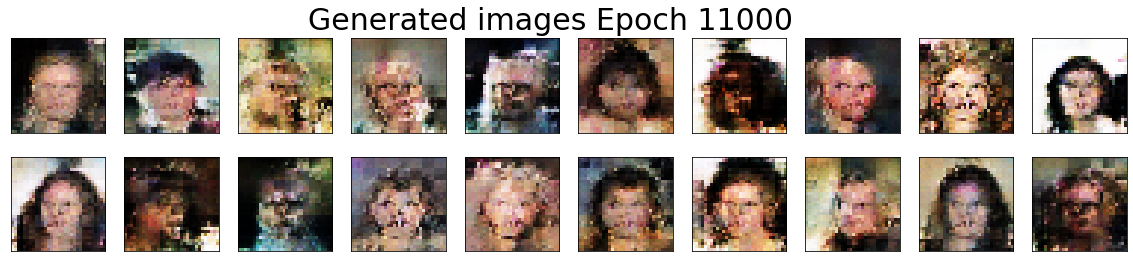

====
Epoch 11100 [D loss: 0.5785986185073853, acc.: 67.3828125%] [G loss: [1.0125942, 0.09472656]]
====
Epoch 11200 [D loss: 0.5789229869842529, acc.: 70.1171875%] [G loss: [1.0649817, 0.103515625]]
====
Epoch 11300 [D loss: 0.5741993188858032, acc.: 70.5078125%] [G loss: [1.0348257, 0.111328125]]
====
Epoch 11400 [D loss: 0.5725373029708862, acc.: 69.82421875%] [G loss: [1.0452013, 0.09082031]]
====
Epoch 11500 [D loss: 0.5920895338058472, acc.: 66.9921875%] [G loss: [0.9899035, 0.13769531]]
====
Epoch 11600 [D loss: 0.5652356147766113, acc.: 69.7265625%] [G loss: [0.9981867, 0.12988281]]
====
Epoch 11700 [D loss: 0.5809189677238464, acc.: 67.7734375%] [G loss: [1.0553972, 0.087890625]]
====
Epoch 11800 [D loss: 0.5728617906570435, acc.: 69.62890625%] [G loss: [1.0685067, 0.06640625]]
====
Epoch 11900 [D loss: 0.5662199258804321, acc.: 69.23828125%] [G loss: [1.0666943, 0.080078125]]
====
Epoch 12000 [D loss: 0.600344717502594, acc.: 66.69921875%] [G loss: [0.9861275, 0.12207031]]


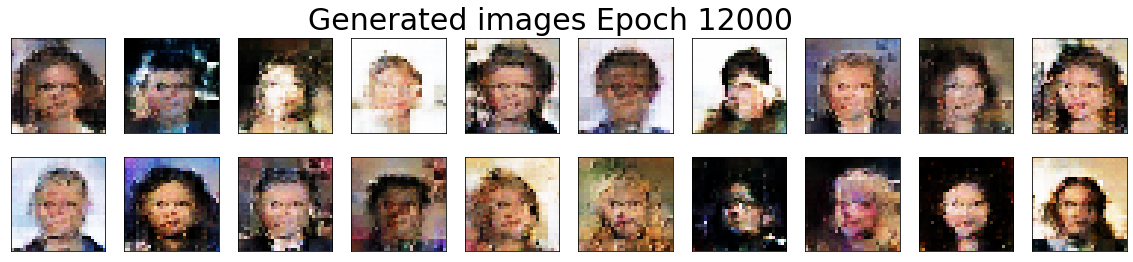

====
Epoch 12100 [D loss: 0.5829406380653381, acc.: 66.6015625%] [G loss: [1.0382618, 0.09667969]]
====
Epoch 12200 [D loss: 0.5658345222473145, acc.: 70.80078125%] [G loss: [1.0478919, 0.091796875]]
====
Epoch 12300 [D loss: 0.5955882668495178, acc.: 66.69921875%] [G loss: [1.0230098, 0.10644531]]
====
Epoch 12400 [D loss: 0.5907622575759888, acc.: 68.06640625%] [G loss: [0.9947159, 0.115234375]]
====
Epoch 12500 [D loss: 0.5720032453536987, acc.: 68.75%] [G loss: [1.027207, 0.11621094]]
====
Epoch 12600 [D loss: 0.576279878616333, acc.: 69.140625%] [G loss: [1.0299335, 0.10546875]]
====
Epoch 12700 [D loss: 0.5858386158943176, acc.: 67.28515625%] [G loss: [1.0265548, 0.087890625]]
====
Epoch 12800 [D loss: 0.6011601686477661, acc.: 65.8203125%] [G loss: [0.99276406, 0.13476562]]
====
Epoch 12900 [D loss: 0.6000118255615234, acc.: 66.11328125%] [G loss: [0.98932344, 0.1171875]]
====
Epoch 13000 [D loss: 0.5982846021652222, acc.: 65.625%] [G loss: [0.9845225, 0.107421875]]


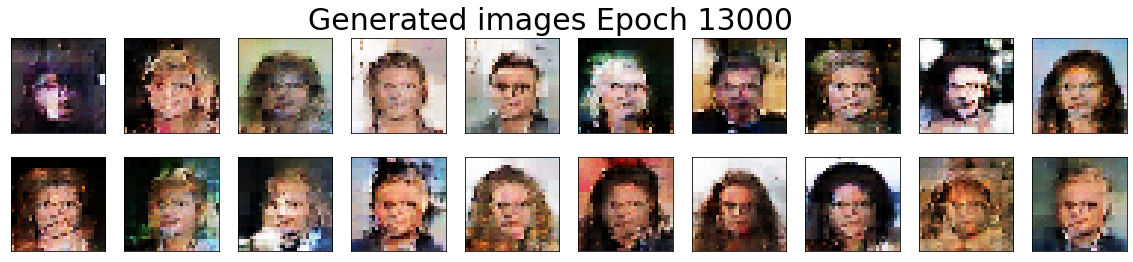

====
Epoch 13100 [D loss: 0.6036955118179321, acc.: 65.625%] [G loss: [1.0190315, 0.10058594]]
====
Epoch 13200 [D loss: 0.5914243459701538, acc.: 68.1640625%] [G loss: [0.99654055, 0.10253906]]
====
Epoch 13300 [D loss: 0.605460524559021, acc.: 66.50390625%] [G loss: [0.9478463, 0.14746094]]
====
Epoch 13400 [D loss: 0.598614513874054, acc.: 67.3828125%] [G loss: [0.96787757, 0.14550781]]
====
Epoch 13500 [D loss: 0.611307680606842, acc.: 66.11328125%] [G loss: [0.9783545, 0.1328125]]
====
Epoch 13600 [D loss: 0.6021279096603394, acc.: 64.94140625%] [G loss: [0.9656041, 0.14453125]]
====
Epoch 13700 [D loss: 0.6079710721969604, acc.: 63.8671875%] [G loss: [0.9503671, 0.12988281]]
====
Epoch 13800 [D loss: 0.6051669716835022, acc.: 63.28125%] [G loss: [0.9786886, 0.12109375]]
====
Epoch 13900 [D loss: 0.5914895534515381, acc.: 66.796875%] [G loss: [0.98287386, 0.12597656]]
====
Epoch 14000 [D loss: 0.6150574684143066, acc.: 63.57421875%] [G loss: [0.95721143, 0.13574219]]


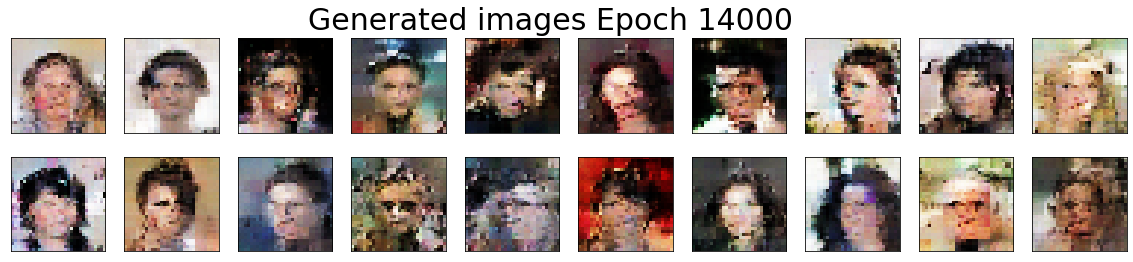

====
Epoch 14100 [D loss: 0.6082866191864014, acc.: 65.91796875%] [G loss: [0.96479243, 0.13964844]]
====
Epoch 14200 [D loss: 0.61235511302948, acc.: 66.015625%] [G loss: [0.9542423, 0.11816406]]
====
Epoch 14300 [D loss: 0.6219282150268555, acc.: 62.20703125%] [G loss: [0.9633886, 0.12597656]]
====
Epoch 14400 [D loss: 0.6300361156463623, acc.: 63.37890625%] [G loss: [0.96844834, 0.12890625]]
====
Epoch 14500 [D loss: 0.6306588649749756, acc.: 63.18359375%] [G loss: [0.9469203, 0.15527344]]
====
Epoch 14600 [D loss: 0.6102766990661621, acc.: 65.72265625%] [G loss: [0.944542, 0.15527344]]
====
Epoch 14700 [D loss: 0.6108258962631226, acc.: 66.9921875%] [G loss: [0.9624279, 0.119140625]]
====
Epoch 14800 [D loss: 0.6078789234161377, acc.: 64.55078125%] [G loss: [0.9294171, 0.15136719]]
====
Epoch 14900 [D loss: 0.6276698112487793, acc.: 65.33203125%] [G loss: [0.95072234, 0.12890625]]
====
Epoch 15000 [D loss: 0.6209831833839417, acc.: 62.3046875%] [G loss: [0.9375136, 0.12597656]]


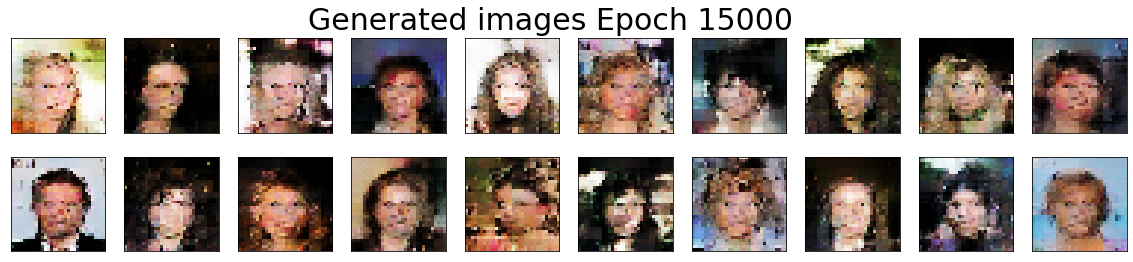

====
Epoch 15100 [D loss: 0.6048319339752197, acc.: 67.28515625%] [G loss: [0.95680135, 0.11621094]]
====
Epoch 15200 [D loss: 0.6186203360557556, acc.: 65.52734375%] [G loss: [0.9371871, 0.13183594]]
====
Epoch 15300 [D loss: 0.636671781539917, acc.: 63.18359375%] [G loss: [0.9468655, 0.12792969]]
====
Epoch 15400 [D loss: 0.6080436706542969, acc.: 64.35546875%] [G loss: [0.9138868, 0.16601562]]
====
Epoch 15500 [D loss: 0.6091959476470947, acc.: 66.50390625%] [G loss: [0.96319807, 0.11816406]]
====
Epoch 15600 [D loss: 0.6204578876495361, acc.: 63.671875%] [G loss: [0.9424535, 0.13769531]]
====
Epoch 15700 [D loss: 0.6246837377548218, acc.: 65.33203125%] [G loss: [0.9525362, 0.12011719]]
====
Epoch 15800 [D loss: 0.6090371012687683, acc.: 64.453125%] [G loss: [0.9491931, 0.15234375]]
====
Epoch 15900 [D loss: 0.6166679859161377, acc.: 64.6484375%] [G loss: [0.9440906, 0.13378906]]
====
Epoch 16000 [D loss: 0.5999655723571777, acc.: 67.3828125%] [G loss: [0.93058324, 0.123046875]]


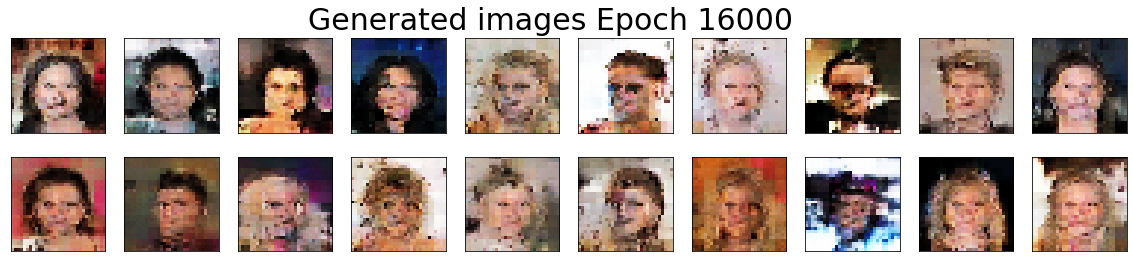

====
Epoch 16100 [D loss: 0.6292327642440796, acc.: 62.20703125%] [G loss: [0.95499825, 0.1328125]]
====
Epoch 16200 [D loss: 0.6326990723609924, acc.: 62.890625%] [G loss: [0.91064155, 0.15527344]]
====
Epoch 16300 [D loss: 0.6096948385238647, acc.: 66.11328125%] [G loss: [0.9594167, 0.13476562]]
====
Epoch 16400 [D loss: 0.6138358116149902, acc.: 64.55078125%] [G loss: [0.93180096, 0.15039062]]
====
Epoch 16500 [D loss: 0.6040949821472168, acc.: 65.52734375%] [G loss: [0.92494184, 0.14550781]]
====
Epoch 16600 [D loss: 0.6300283670425415, acc.: 64.453125%] [G loss: [0.9544617, 0.115234375]]
====
Epoch 16700 [D loss: 0.5963640213012695, acc.: 66.11328125%] [G loss: [0.9669136, 0.10839844]]
====
Epoch 16800 [D loss: 0.6087679266929626, acc.: 65.4296875%] [G loss: [0.9651644, 0.1328125]]
====
Epoch 16900 [D loss: 0.6219878196716309, acc.: 63.96484375%] [G loss: [0.9127919, 0.16894531]]
====
Epoch 17000 [D loss: 0.629952073097229, acc.: 61.71875%] [G loss: [0.91402245, 0.1796875]]


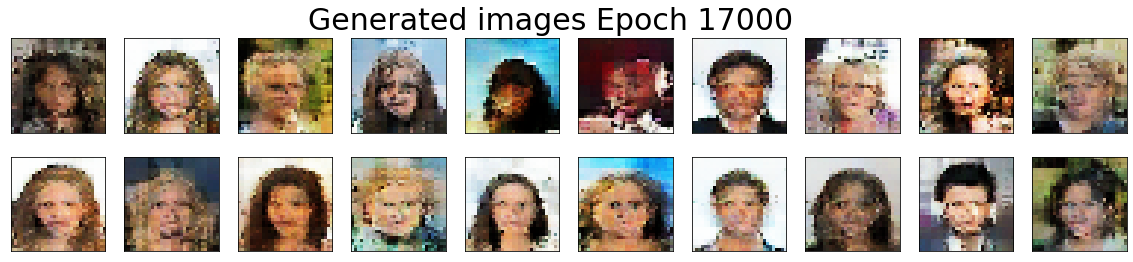

====
Epoch 17100 [D loss: 0.6163246631622314, acc.: 64.35546875%] [G loss: [0.9665909, 0.12109375]]
====
Epoch 17200 [D loss: 0.619170069694519, acc.: 64.94140625%] [G loss: [0.9458667, 0.14453125]]
====
Epoch 17300 [D loss: 0.6165979504585266, acc.: 63.0859375%] [G loss: [0.9515637, 0.13085938]]
====
Epoch 17400 [D loss: 0.6155287623405457, acc.: 64.74609375%] [G loss: [0.96418184, 0.123046875]]
====
Epoch 17500 [D loss: 0.5913527011871338, acc.: 67.87109375%] [G loss: [0.9466399, 0.16113281]]
====
Epoch 17600 [D loss: 0.6179720163345337, acc.: 64.453125%] [G loss: [0.9509696, 0.1484375]]
====
Epoch 17700 [D loss: 0.5972460508346558, acc.: 66.50390625%] [G loss: [0.94273245, 0.14355469]]
====
Epoch 17800 [D loss: 0.6100999116897583, acc.: 65.33203125%] [G loss: [0.949465, 0.13769531]]
====
Epoch 17900 [D loss: 0.6180915832519531, acc.: 65.4296875%] [G loss: [0.9564102, 0.12890625]]
====
Epoch 18000 [D loss: 0.5997859239578247, acc.: 66.89453125%] [G loss: [0.9395262, 0.16894531]]


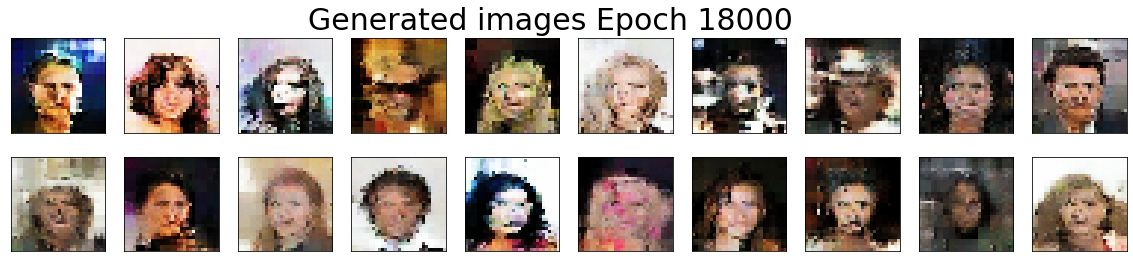

====
Epoch 18100 [D loss: 0.6109061241149902, acc.: 62.98828125%] [G loss: [0.9876654, 0.12988281]]
====
Epoch 18200 [D loss: 0.6009055376052856, acc.: 67.48046875%] [G loss: [0.96713483, 0.12695312]]
====
Epoch 18300 [D loss: 0.6198245882987976, acc.: 64.94140625%] [G loss: [0.9688331, 0.12792969]]
====
Epoch 18400 [D loss: 0.6093205213546753, acc.: 66.2109375%] [G loss: [0.94744396, 0.16894531]]
====
Epoch 18500 [D loss: 0.6128782033920288, acc.: 64.94140625%] [G loss: [0.94526714, 0.15136719]]
====
Epoch 18600 [D loss: 0.608985185623169, acc.: 66.50390625%] [G loss: [0.9466793, 0.15527344]]
====
Epoch 18700 [D loss: 0.6031724214553833, acc.: 66.796875%] [G loss: [0.9607734, 0.14453125]]
====
Epoch 18800 [D loss: 0.609403133392334, acc.: 65.8203125%] [G loss: [0.9570465, 0.15234375]]
====
Epoch 18900 [D loss: 0.6041785478591919, acc.: 65.0390625%] [G loss: [0.9618617, 0.14257812]]
====
Epoch 19000 [D loss: 0.6023319959640503, acc.: 68.359375%] [G loss: [0.934306, 0.15234375]]


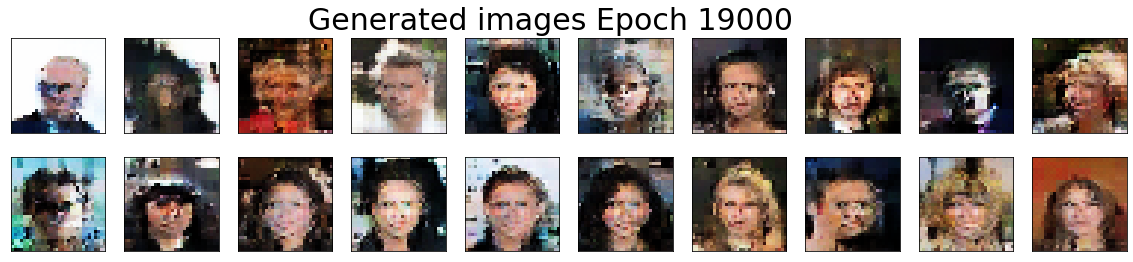

====
Epoch 19100 [D loss: 0.6241029500961304, acc.: 62.6953125%] [G loss: [0.9520156, 0.15625]]
====
Epoch 19200 [D loss: 0.6212878227233887, acc.: 61.81640625%] [G loss: [0.9624629, 0.14160156]]
====
Epoch 19300 [D loss: 0.6230478286743164, acc.: 64.35546875%] [G loss: [0.9602748, 0.15917969]]
====
Epoch 19400 [D loss: 0.60382479429245, acc.: 65.91796875%] [G loss: [0.94871914, 0.1484375]]
====
Epoch 19500 [D loss: 0.613719642162323, acc.: 65.13671875%] [G loss: [0.97983325, 0.12890625]]
====
Epoch 19600 [D loss: 0.6086930632591248, acc.: 65.0390625%] [G loss: [0.96686125, 0.14257812]]
====
Epoch 19700 [D loss: 0.6005496382713318, acc.: 68.359375%] [G loss: [0.9639468, 0.13574219]]
====
Epoch 19800 [D loss: 0.6064850091934204, acc.: 65.91796875%] [G loss: [0.9471281, 0.16796875]]
====
Epoch 19900 [D loss: 0.5912042856216431, acc.: 68.1640625%] [G loss: [0.9476092, 0.17675781]]
====
Epoch 20000 [D loss: 0.5984464883804321, acc.: 65.13671875%] [G loss: [1.008187, 0.11328125]]


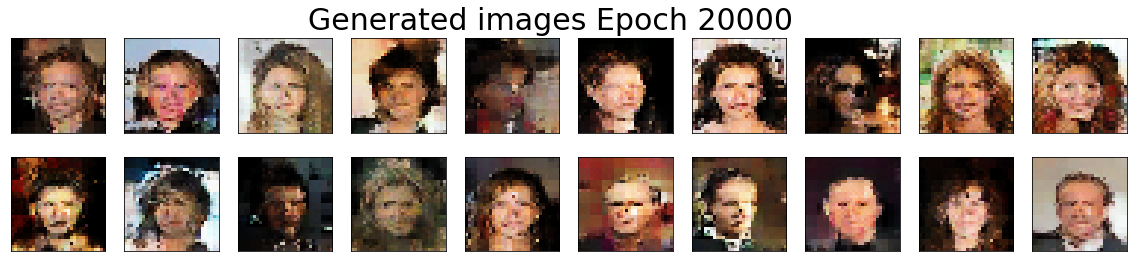

====
Epoch 20100 [D loss: 0.6097649335861206, acc.: 65.13671875%] [G loss: [0.97393423, 0.13964844]]
====
Epoch 20200 [D loss: 0.6083523035049438, acc.: 65.625%] [G loss: [0.9476125, 0.1484375]]
====
Epoch 20300 [D loss: 0.5903210639953613, acc.: 68.359375%] [G loss: [0.9526695, 0.16699219]]
====
Epoch 20400 [D loss: 0.5921846628189087, acc.: 67.67578125%] [G loss: [1.0089015, 0.13964844]]
====
Epoch 20500 [D loss: 0.6063889861106873, acc.: 66.69921875%] [G loss: [0.95258003, 0.13574219]]
====
Epoch 20600 [D loss: 0.6160048246383667, acc.: 64.0625%] [G loss: [0.95557916, 0.15039062]]
====
Epoch 20700 [D loss: 0.624843180179596, acc.: 63.671875%] [G loss: [0.98622227, 0.15234375]]
====
Epoch 20800 [D loss: 0.6055525541305542, acc.: 64.55078125%] [G loss: [0.946474, 0.16699219]]
====
Epoch 20900 [D loss: 0.6107966899871826, acc.: 65.13671875%] [G loss: [0.9682015, 0.17089844]]
====
Epoch 21000 [D loss: 0.5971944332122803, acc.: 67.67578125%] [G loss: [0.9816632, 0.14453125]]


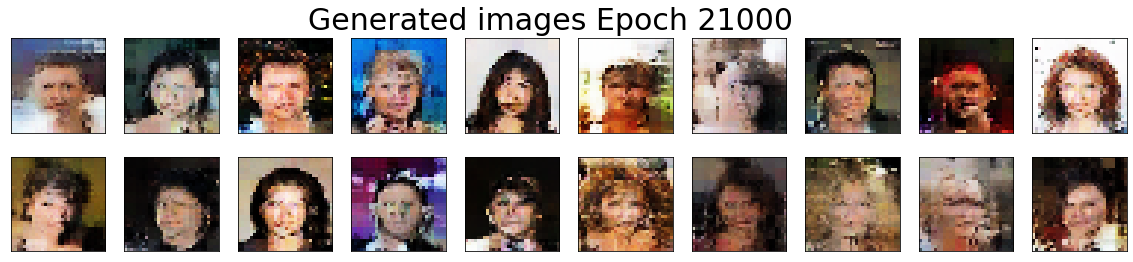

====
Epoch 21100 [D loss: 0.6143501996994019, acc.: 65.0390625%] [G loss: [0.97403705, 0.15039062]]
====
Epoch 21200 [D loss: 0.610822319984436, acc.: 64.94140625%] [G loss: [0.9994873, 0.12890625]]
====
Epoch 21300 [D loss: 0.599016547203064, acc.: 67.96875%] [G loss: [0.9769256, 0.13476562]]
====
Epoch 21400 [D loss: 0.606124997138977, acc.: 65.8203125%] [G loss: [0.98647904, 0.13476562]]
====
Epoch 21500 [D loss: 0.5928520560264587, acc.: 66.30859375%] [G loss: [0.988091, 0.14648438]]
====
Epoch 21600 [D loss: 0.6090185642242432, acc.: 65.4296875%] [G loss: [0.9832281, 0.16113281]]
====
Epoch 21700 [D loss: 0.5908432006835938, acc.: 67.1875%] [G loss: [0.97047484, 0.16796875]]
====
Epoch 21800 [D loss: 0.616492748260498, acc.: 64.453125%] [G loss: [0.9808307, 0.140625]]
====
Epoch 21900 [D loss: 0.611315906047821, acc.: 66.40625%] [G loss: [0.9804668, 0.16015625]]
====
Epoch 22000 [D loss: 0.5926790237426758, acc.: 67.08984375%] [G loss: [0.9599767, 0.15722656]]


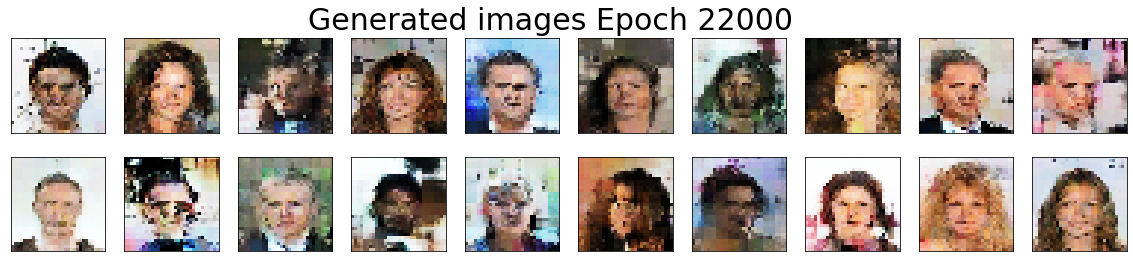

====
Epoch 22100 [D loss: 0.5922664999961853, acc.: 67.3828125%] [G loss: [1.0044789, 0.12988281]]
====
Epoch 22200 [D loss: 0.6146613359451294, acc.: 64.453125%] [G loss: [0.95308495, 0.17382812]]
====
Epoch 22300 [D loss: 0.6094561815261841, acc.: 64.0625%] [G loss: [0.9850819, 0.15722656]]
====
Epoch 22400 [D loss: 0.6122865676879883, acc.: 63.76953125%] [G loss: [0.9909481, 0.14648438]]
====
Epoch 22500 [D loss: 0.591075599193573, acc.: 67.578125%] [G loss: [0.9980577, 0.12792969]]
====
Epoch 22600 [D loss: 0.5892362594604492, acc.: 68.26171875%] [G loss: [0.9716883, 0.13671875]]
====
Epoch 22700 [D loss: 0.5860218405723572, acc.: 68.06640625%] [G loss: [1.0038707, 0.13964844]]
====
Epoch 22800 [D loss: 0.6011988520622253, acc.: 65.91796875%] [G loss: [1.003551, 0.1328125]]
====
Epoch 22900 [D loss: 0.5856494903564453, acc.: 67.28515625%] [G loss: [1.0042902, 0.16308594]]
====
Epoch 23000 [D loss: 0.6132364869117737, acc.: 65.52734375%] [G loss: [0.9799664, 0.14257812]]


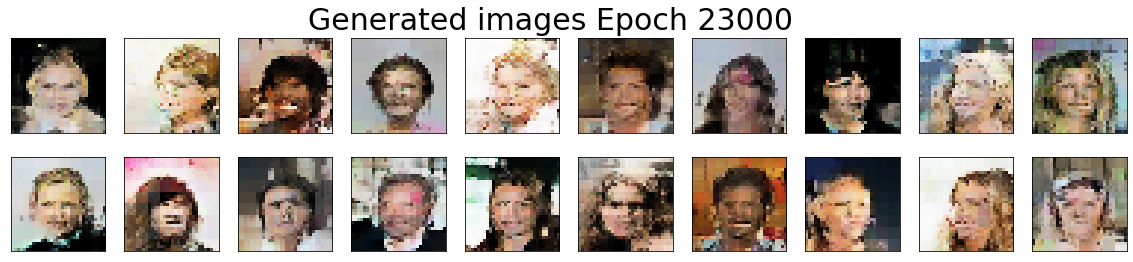

====
Epoch 23100 [D loss: 0.6082426905632019, acc.: 64.2578125%] [G loss: [0.99412584, 0.14550781]]
====
Epoch 23200 [D loss: 0.6017763614654541, acc.: 64.453125%] [G loss: [0.99138474, 0.14941406]]
====
Epoch 23300 [D loss: 0.5955098867416382, acc.: 65.33203125%] [G loss: [0.99655807, 0.13476562]]
====
Epoch 23400 [D loss: 0.6004846096038818, acc.: 66.796875%] [G loss: [1.0074532, 0.1484375]]
====
Epoch 23500 [D loss: 0.5989910364151001, acc.: 65.8203125%] [G loss: [1.0029914, 0.1484375]]
====
Epoch 23600 [D loss: 0.5871329307556152, acc.: 67.578125%] [G loss: [0.9918771, 0.15039062]]
====
Epoch 23700 [D loss: 0.5945014357566833, acc.: 66.11328125%] [G loss: [1.0130006, 0.13378906]]
====
Epoch 23800 [D loss: 0.5903562307357788, acc.: 66.69921875%] [G loss: [0.9804677, 0.15136719]]
====
Epoch 23900 [D loss: 0.5856037139892578, acc.: 69.04296875%] [G loss: [1.0328828, 0.1328125]]
====
Epoch 24000 [D loss: 0.5918415188789368, acc.: 67.7734375%] [G loss: [1.0303481, 0.12890625]]


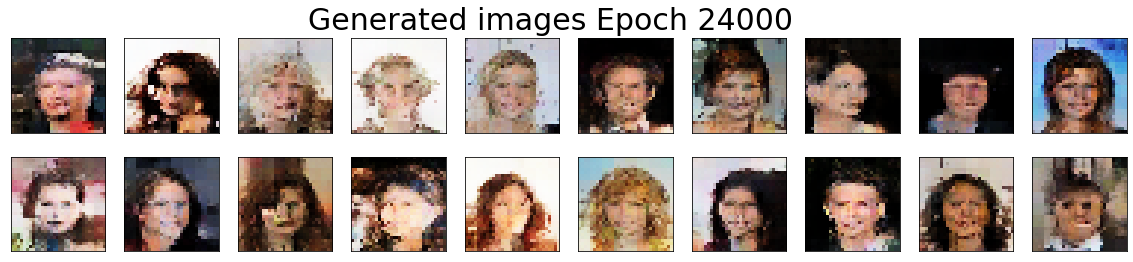

====
Epoch 24100 [D loss: 0.5941762924194336, acc.: 67.87109375%] [G loss: [1.0215491, 0.15234375]]
====
Epoch 24200 [D loss: 0.5868811011314392, acc.: 67.3828125%] [G loss: [1.0143682, 0.14941406]]
====
Epoch 24300 [D loss: 0.6010117530822754, acc.: 66.30859375%] [G loss: [1.0146205, 0.12402344]]
====
Epoch 24400 [D loss: 0.6029101610183716, acc.: 64.16015625%] [G loss: [1.0213264, 0.12792969]]
====
Epoch 24500 [D loss: 0.6083060503005981, acc.: 65.625%] [G loss: [1.0045773, 0.13964844]]
====
Epoch 24600 [D loss: 0.5881894826889038, acc.: 66.9921875%] [G loss: [1.062834, 0.1171875]]
====
Epoch 24700 [D loss: 0.5935221314430237, acc.: 66.40625%] [G loss: [1.0263331, 0.13671875]]
====
Epoch 24800 [D loss: 0.6027829647064209, acc.: 66.015625%] [G loss: [1.0126822, 0.14355469]]
====
Epoch 24900 [D loss: 0.5825868844985962, acc.: 68.45703125%] [G loss: [1.0172411, 0.14257812]]
====
Epoch 25000 [D loss: 0.6031091213226318, acc.: 65.625%] [G loss: [1.0412213, 0.12597656]]


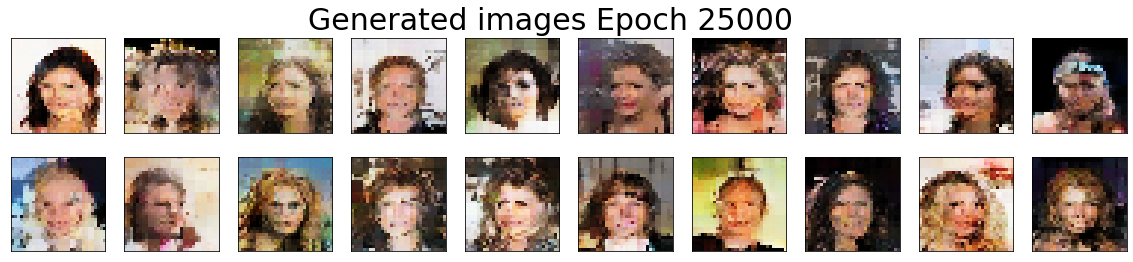

====
Epoch 25100 [D loss: 0.5824754238128662, acc.: 67.96875%] [G loss: [0.99948686, 0.15527344]]
====
Epoch 25200 [D loss: 0.5850340723991394, acc.: 67.67578125%] [G loss: [1.0100955, 0.15332031]]
====
Epoch 25300 [D loss: 0.5610929727554321, acc.: 69.43359375%] [G loss: [1.087058, 0.11230469]]
====
Epoch 25400 [D loss: 0.6100262403488159, acc.: 64.6484375%] [G loss: [1.0009018, 0.14648438]]
====
Epoch 25500 [D loss: 0.5825550556182861, acc.: 67.96875%] [G loss: [1.0100843, 0.16113281]]
====
Epoch 25600 [D loss: 0.6018518209457397, acc.: 66.30859375%] [G loss: [1.0612631, 0.12011719]]
====
Epoch 25700 [D loss: 0.5734965205192566, acc.: 69.921875%] [G loss: [1.0324922, 0.14453125]]
====
Epoch 25800 [D loss: 0.5878481864929199, acc.: 66.6015625%] [G loss: [1.0269601, 0.15234375]]
====
Epoch 25900 [D loss: 0.5943042635917664, acc.: 66.40625%] [G loss: [1.0660192, 0.12988281]]
====
Epoch 26000 [D loss: 0.584787130355835, acc.: 67.67578125%] [G loss: [1.0158956, 0.16113281]]


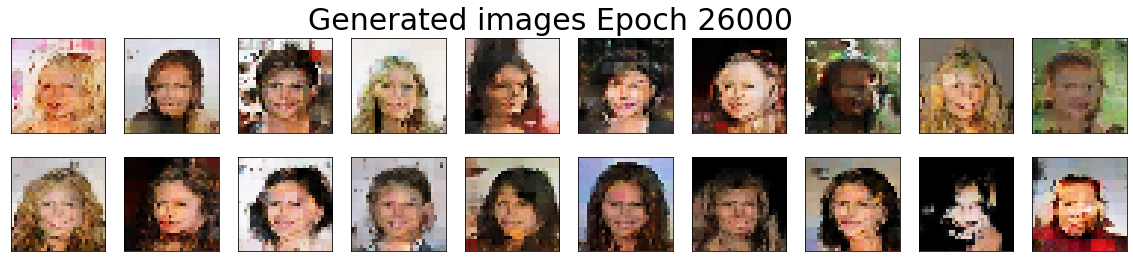

====
Epoch 26100 [D loss: 0.5723312497138977, acc.: 69.7265625%] [G loss: [1.029079, 0.14648438]]
====
Epoch 26200 [D loss: 0.5879400372505188, acc.: 68.65234375%] [G loss: [1.0329324, 0.15039062]]
====
Epoch 26300 [D loss: 0.5831677317619324, acc.: 67.7734375%] [G loss: [1.0798548, 0.12890625]]
====
Epoch 26400 [D loss: 0.592422604560852, acc.: 66.50390625%] [G loss: [1.0260221, 0.13476562]]
====
Epoch 26500 [D loss: 0.5828403234481812, acc.: 67.67578125%] [G loss: [1.0383346, 0.13867188]]
====
Epoch 26600 [D loss: 0.573920488357544, acc.: 67.7734375%] [G loss: [1.0688586, 0.12890625]]
====
Epoch 26700 [D loss: 0.5876984000205994, acc.: 67.67578125%] [G loss: [1.0773578, 0.119140625]]
====
Epoch 26800 [D loss: 0.5742433071136475, acc.: 68.45703125%] [G loss: [1.0499736, 0.14746094]]
====
Epoch 26900 [D loss: 0.5787681341171265, acc.: 67.578125%] [G loss: [1.0531212, 0.11621094]]
====
Epoch 27000 [D loss: 0.5976874828338623, acc.: 66.11328125%] [G loss: [1.0488493, 0.140625]]


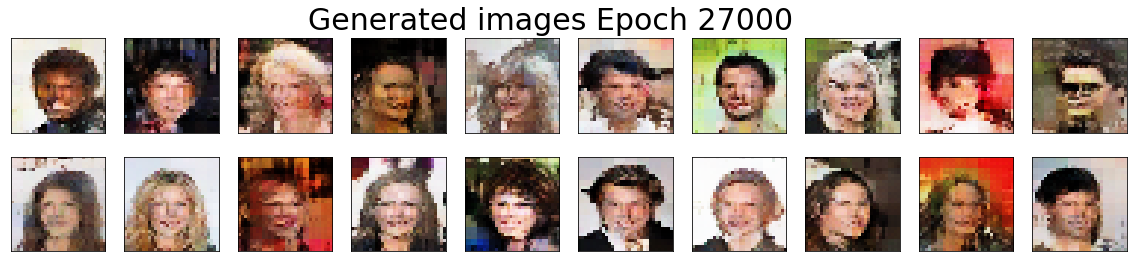

====
Epoch 27100 [D loss: 0.5909982919692993, acc.: 66.11328125%] [G loss: [1.0283763, 0.14160156]]
====
Epoch 27200 [D loss: 0.5903626680374146, acc.: 66.2109375%] [G loss: [1.0435301, 0.15820312]]
====
Epoch 27300 [D loss: 0.5930050015449524, acc.: 66.30859375%] [G loss: [1.0459939, 0.10546875]]
====
Epoch 27400 [D loss: 0.5674440860748291, acc.: 69.3359375%] [G loss: [1.0702045, 0.13476562]]
====
Epoch 27500 [D loss: 0.5700943470001221, acc.: 69.82421875%] [G loss: [1.0326031, 0.13769531]]
====
Epoch 27600 [D loss: 0.5814963579177856, acc.: 67.87109375%] [G loss: [1.0427787, 0.14550781]]
====
Epoch 27700 [D loss: 0.5595057010650635, acc.: 69.140625%] [G loss: [1.0395174, 0.13769531]]
====
Epoch 27800 [D loss: 0.5606563091278076, acc.: 69.82421875%] [G loss: [1.0480472, 0.1484375]]
====
Epoch 27900 [D loss: 0.5808860063552856, acc.: 68.06640625%] [G loss: [1.0457443, 0.140625]]
====
Epoch 28000 [D loss: 0.5672487020492554, acc.: 71.09375%] [G loss: [1.0756129, 0.13671875]]


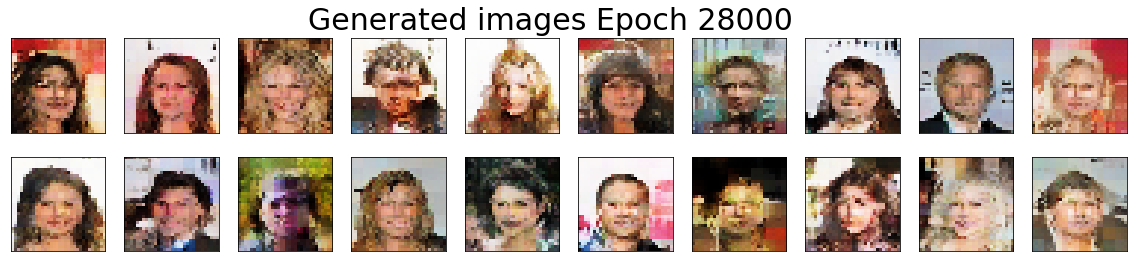

====
Epoch 28100 [D loss: 0.5409643650054932, acc.: 72.265625%] [G loss: [1.0549476, 0.15136719]]
====
Epoch 28200 [D loss: 0.5711071491241455, acc.: 68.75%] [G loss: [1.0827775, 0.115234375]]
====
Epoch 28300 [D loss: 0.5664913654327393, acc.: 70.5078125%] [G loss: [1.0968928, 0.12988281]]
====
Epoch 28400 [D loss: 0.5609279870986938, acc.: 70.5078125%] [G loss: [1.0625486, 0.13769531]]
====
Epoch 28500 [D loss: 0.5635598301887512, acc.: 71.09375%] [G loss: [1.0685608, 0.1328125]]
====
Epoch 28600 [D loss: 0.540688157081604, acc.: 71.09375%] [G loss: [1.056494, 0.15625]]
====
Epoch 28700 [D loss: 0.5911128520965576, acc.: 68.26171875%] [G loss: [1.0846045, 0.11621094]]
====
Epoch 28800 [D loss: 0.5791671276092529, acc.: 68.75%] [G loss: [1.062551, 0.12597656]]
====
Epoch 28900 [D loss: 0.5552710890769958, acc.: 71.2890625%] [G loss: [1.1137227, 0.123046875]]
====
Epoch 29000 [D loss: 0.5603007078170776, acc.: 69.82421875%] [G loss: [1.0954895, 0.125]]


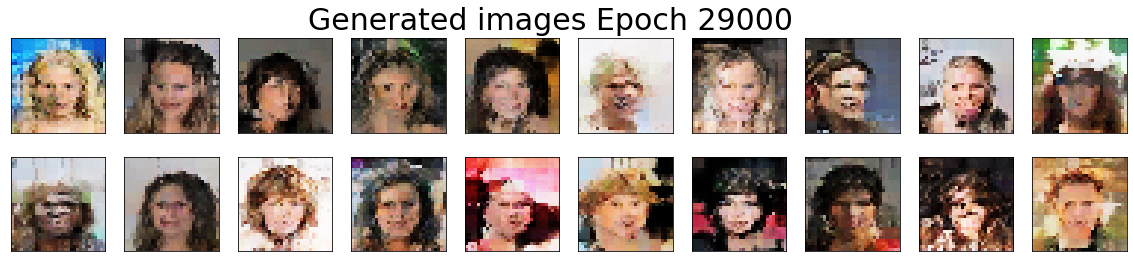

====
Epoch 29100 [D loss: 0.5709009170532227, acc.: 69.23828125%] [G loss: [1.068238, 0.14257812]]
====
Epoch 29200 [D loss: 0.5473716855049133, acc.: 71.97265625%] [G loss: [1.0939167, 0.13867188]]
====
Epoch 29300 [D loss: 0.591118335723877, acc.: 67.3828125%] [G loss: [1.0412132, 0.15527344]]
====
Epoch 29400 [D loss: 0.540177583694458, acc.: 71.38671875%] [G loss: [1.1079743, 0.13867188]]
====
Epoch 29500 [D loss: 0.5453356504440308, acc.: 71.77734375%] [G loss: [1.1031773, 0.12792969]]
====
Epoch 29600 [D loss: 0.5562788248062134, acc.: 69.23828125%] [G loss: [1.0878183, 0.12597656]]
====
Epoch 29700 [D loss: 0.5777683258056641, acc.: 66.30859375%] [G loss: [1.0981438, 0.119140625]]
====
Epoch 29800 [D loss: 0.5787100791931152, acc.: 68.75%] [G loss: [1.1358707, 0.13671875]]
====
Epoch 29900 [D loss: 0.5665878653526306, acc.: 69.53125%] [G loss: [1.1179092, 0.12792969]]
====
Epoch 30000 [D loss: 0.5611080527305603, acc.: 69.3359375%] [G loss: [1.0816128, 0.14648438]]


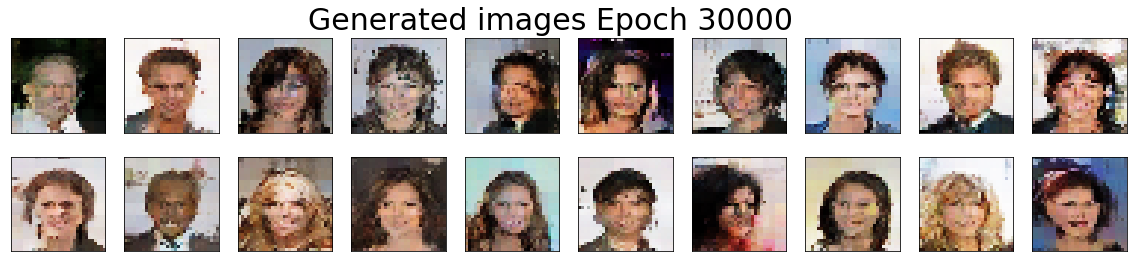

====
Epoch 30100 [D loss: 0.5521183609962463, acc.: 70.5078125%] [G loss: [1.10537, 0.1328125]]
====
Epoch 30200 [D loss: 0.5679689645767212, acc.: 68.65234375%] [G loss: [1.1127664, 0.12402344]]
====
Epoch 30300 [D loss: 0.5592615008354187, acc.: 69.921875%] [G loss: [1.0810163, 0.14160156]]
====
Epoch 30400 [D loss: 0.5590577125549316, acc.: 70.3125%] [G loss: [1.1210084, 0.140625]]
====
Epoch 30500 [D loss: 0.5435218214988708, acc.: 70.80078125%] [G loss: [1.1187073, 0.13574219]]
====
Epoch 30600 [D loss: 0.5729899406433105, acc.: 69.23828125%] [G loss: [1.1414313, 0.10058594]]
====
Epoch 30700 [D loss: 0.5577268600463867, acc.: 70.41015625%] [G loss: [1.0905464, 0.12597656]]
====
Epoch 30800 [D loss: 0.5469750165939331, acc.: 71.2890625%] [G loss: [1.1108387, 0.11328125]]
====
Epoch 30900 [D loss: 0.5599499940872192, acc.: 71.6796875%] [G loss: [1.1119386, 0.12109375]]
====
Epoch 31000 [D loss: 0.5439274311065674, acc.: 70.41015625%] [G loss: [1.1316558, 0.1328125]]


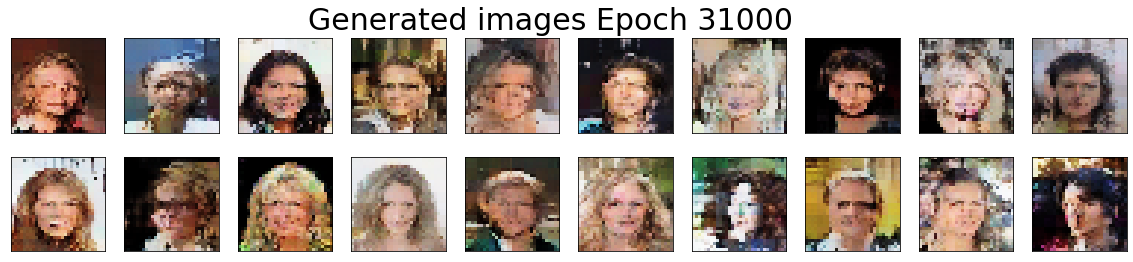

====
Epoch 31100 [D loss: 0.5573863983154297, acc.: 70.99609375%] [G loss: [1.144015, 0.12207031]]
====
Epoch 31200 [D loss: 0.5566835403442383, acc.: 69.7265625%] [G loss: [1.1281005, 0.11816406]]
====
Epoch 31300 [D loss: 0.5148857831954956, acc.: 73.828125%] [G loss: [1.1492523, 0.12597656]]
====
Epoch 31400 [D loss: 0.5730347633361816, acc.: 69.3359375%] [G loss: [1.1361765, 0.109375]]
====
Epoch 31500 [D loss: 0.5479104518890381, acc.: 70.21484375%] [G loss: [1.1410916, 0.11816406]]
====
Epoch 31600 [D loss: 0.5520391464233398, acc.: 72.4609375%] [G loss: [1.1304542, 0.13964844]]
====
Epoch 31700 [D loss: 0.565302312374115, acc.: 69.82421875%] [G loss: [1.1143185, 0.14746094]]
====
Epoch 31800 [D loss: 0.5660101771354675, acc.: 69.04296875%] [G loss: [1.1318203, 0.14160156]]
====
Epoch 31900 [D loss: 0.5569945573806763, acc.: 71.2890625%] [G loss: [1.1378706, 0.119140625]]
====
Epoch 32000 [D loss: 0.5812643766403198, acc.: 67.578125%] [G loss: [1.1396444, 0.119140625]]


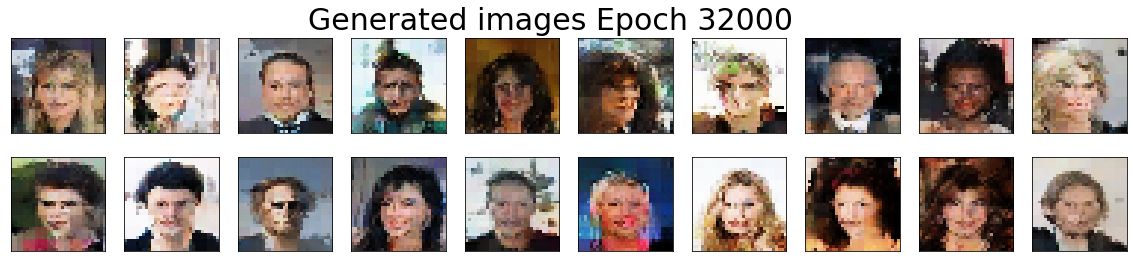

====
Epoch 32100 [D loss: 0.5519381165504456, acc.: 70.41015625%] [G loss: [1.123038, 0.14160156]]
====
Epoch 32200 [D loss: 0.556601881980896, acc.: 70.99609375%] [G loss: [1.1476295, 0.115234375]]
====
Epoch 32300 [D loss: 0.560450553894043, acc.: 69.53125%] [G loss: [1.1633226, 0.12207031]]
====
Epoch 32400 [D loss: 0.5540527701377869, acc.: 72.16796875%] [G loss: [1.1266546, 0.140625]]
====
Epoch 32500 [D loss: 0.5671665668487549, acc.: 69.53125%] [G loss: [1.1198732, 0.13574219]]
====
Epoch 32600 [D loss: 0.5419741272926331, acc.: 72.16796875%] [G loss: [1.124008, 0.13183594]]
====
Epoch 32700 [D loss: 0.527841329574585, acc.: 72.4609375%] [G loss: [1.1323066, 0.12695312]]
====
Epoch 32800 [D loss: 0.5735269784927368, acc.: 69.53125%] [G loss: [1.1435776, 0.12011719]]
====
Epoch 32900 [D loss: 0.5420684218406677, acc.: 70.99609375%] [G loss: [1.1682918, 0.111328125]]
====
Epoch 33000 [D loss: 0.5292719602584839, acc.: 72.16796875%] [G loss: [1.171506, 0.1171875]]


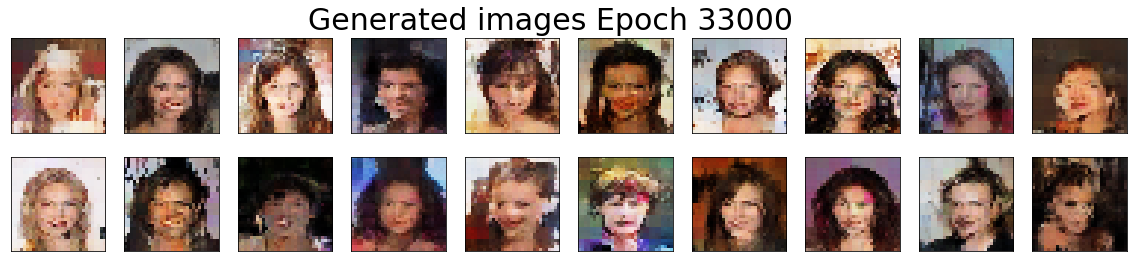

====
Epoch 33100 [D loss: 0.5408765077590942, acc.: 72.94921875%] [G loss: [1.1773946, 0.111328125]]
====
Epoch 33200 [D loss: 0.5479652881622314, acc.: 70.99609375%] [G loss: [1.1532862, 0.13085938]]
====
Epoch 33300 [D loss: 0.5474593639373779, acc.: 73.14453125%] [G loss: [1.153509, 0.12890625]]
====
Epoch 33400 [D loss: 0.5551102161407471, acc.: 70.3125%] [G loss: [1.1502731, 0.10644531]]
====
Epoch 33500 [D loss: 0.49152177572250366, acc.: 75.87890625%] [G loss: [1.1376332, 0.13476562]]
====
Epoch 33600 [D loss: 0.5464462041854858, acc.: 72.94921875%] [G loss: [1.1615996, 0.13183594]]
====
Epoch 33700 [D loss: 0.5357824563980103, acc.: 72.55859375%] [G loss: [1.1596395, 0.12011719]]
====
Epoch 33800 [D loss: 0.5482044219970703, acc.: 70.80078125%] [G loss: [1.1633129, 0.119140625]]
====
Epoch 33900 [D loss: 0.5455076694488525, acc.: 70.80078125%] [G loss: [1.159629, 0.1171875]]
====
Epoch 34000 [D loss: 0.5533764362335205, acc.: 71.875%] [G loss: [1.1746014, 0.13574219]]


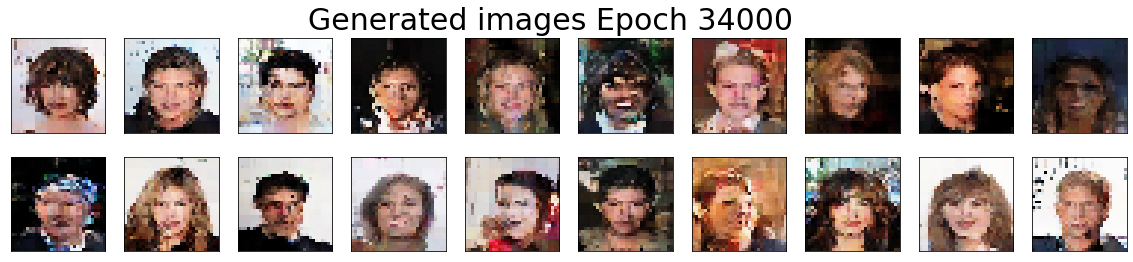

====
Epoch 34100 [D loss: 0.5417400598526001, acc.: 71.97265625%] [G loss: [1.1591885, 0.13183594]]
====
Epoch 34200 [D loss: 0.5247728824615479, acc.: 71.77734375%] [G loss: [1.1854236, 0.103515625]]
====
Epoch 34300 [D loss: 0.5385319590568542, acc.: 71.09375%] [G loss: [1.1802688, 0.115234375]]
====
Epoch 34400 [D loss: 0.5198248624801636, acc.: 74.0234375%] [G loss: [1.1683103, 0.12109375]]
====
Epoch 34500 [D loss: 0.5295449495315552, acc.: 72.0703125%] [G loss: [1.2079735, 0.123046875]]
====
Epoch 34600 [D loss: 0.5334137082099915, acc.: 71.77734375%] [G loss: [1.1559595, 0.13769531]]
====
Epoch 34700 [D loss: 0.5335379838943481, acc.: 72.55859375%] [G loss: [1.1799068, 0.12402344]]
====
Epoch 34800 [D loss: 0.5220843553543091, acc.: 72.0703125%] [G loss: [1.216531, 0.119140625]]
====
Epoch 34900 [D loss: 0.544424295425415, acc.: 72.16796875%] [G loss: [1.1892923, 0.11035156]]
====
Epoch 35000 [D loss: 0.5200514793395996, acc.: 75.1953125%] [G loss: [1.1843783, 0.10644531]]


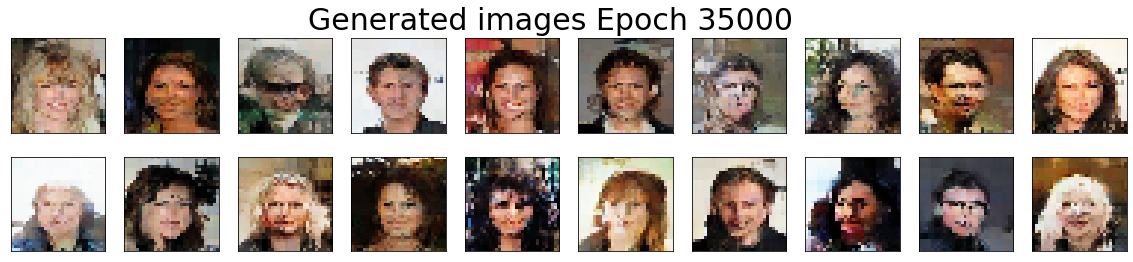

====
Epoch 35100 [D loss: 0.542374849319458, acc.: 72.16796875%] [G loss: [1.1334964, 0.140625]]
====
Epoch 35200 [D loss: 0.5408430099487305, acc.: 71.19140625%] [G loss: [1.1878341, 0.11035156]]
====
Epoch 35300 [D loss: 0.5497796535491943, acc.: 72.4609375%] [G loss: [1.1608897, 0.125]]
====
Epoch 35400 [D loss: 0.5355092287063599, acc.: 72.36328125%] [G loss: [1.1957936, 0.11425781]]
====
Epoch 35500 [D loss: 0.5347175598144531, acc.: 72.4609375%] [G loss: [1.2002676, 0.12695312]]
====
Epoch 35600 [D loss: 0.5287381410598755, acc.: 72.265625%] [G loss: [1.2118821, 0.09765625]]
====
Epoch 35700 [D loss: 0.5312074422836304, acc.: 73.046875%] [G loss: [1.1593492, 0.11621094]]
====
Epoch 35800 [D loss: 0.530093252658844, acc.: 71.6796875%] [G loss: [1.2219616, 0.10644531]]
====
Epoch 35900 [D loss: 0.5168513059616089, acc.: 73.6328125%] [G loss: [1.2022458, 0.12011719]]
====
Epoch 36000 [D loss: 0.5303424596786499, acc.: 72.4609375%] [G loss: [1.2463641, 0.111328125]]


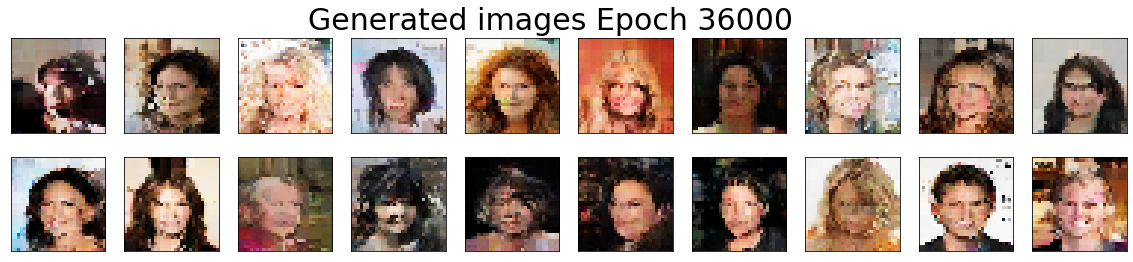

====
Epoch 36100 [D loss: 0.5520057678222656, acc.: 70.99609375%] [G loss: [1.2257622, 0.111328125]]
====
Epoch 36200 [D loss: 0.5473427772521973, acc.: 70.5078125%] [G loss: [1.2138581, 0.107421875]]
====
Epoch 36300 [D loss: 0.5269530415534973, acc.: 72.36328125%] [G loss: [1.1959035, 0.12792969]]
====
Epoch 36400 [D loss: 0.5416533350944519, acc.: 71.875%] [G loss: [1.2386699, 0.10058594]]
====
Epoch 36500 [D loss: 0.5243315696716309, acc.: 71.2890625%] [G loss: [1.2317683, 0.11425781]]
====
Epoch 36600 [D loss: 0.5443551540374756, acc.: 69.62890625%] [G loss: [1.2171088, 0.1171875]]
====
Epoch 36700 [D loss: 0.5081254243850708, acc.: 74.70703125%] [G loss: [1.1950699, 0.14550781]]
====
Epoch 36800 [D loss: 0.5231719017028809, acc.: 72.94921875%] [G loss: [1.2309552, 0.11230469]]
====
Epoch 36900 [D loss: 0.5219296216964722, acc.: 71.97265625%] [G loss: [1.213163, 0.10839844]]
====
Epoch 37000 [D loss: 0.518547773361206, acc.: 73.73046875%] [G loss: [1.2283585, 0.11621094]]


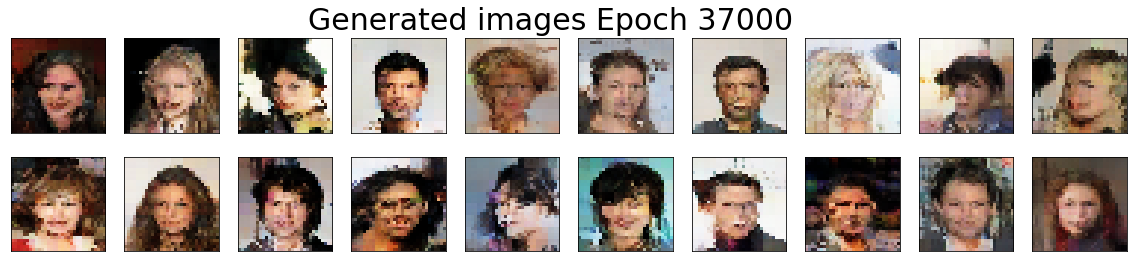

====
Epoch 37100 [D loss: 0.5461642742156982, acc.: 71.484375%] [G loss: [1.2608633, 0.09082031]]
====
Epoch 37200 [D loss: 0.5204280614852905, acc.: 72.75390625%] [G loss: [1.2409368, 0.1015625]]
====
Epoch 37300 [D loss: 0.5241458415985107, acc.: 72.75390625%] [G loss: [1.1993717, 0.12597656]]
====
Epoch 37400 [D loss: 0.5154953598976135, acc.: 74.70703125%] [G loss: [1.195971, 0.125]]
====
Epoch 37500 [D loss: 0.5079741477966309, acc.: 75.48828125%] [G loss: [1.2320349, 0.1171875]]
====
Epoch 37600 [D loss: 0.5180222988128662, acc.: 72.94921875%] [G loss: [1.2160933, 0.12402344]]
====
Epoch 37700 [D loss: 0.5216423273086548, acc.: 73.33984375%] [G loss: [1.2235414, 0.123046875]]
====
Epoch 37800 [D loss: 0.5486798882484436, acc.: 71.19140625%] [G loss: [1.2316475, 0.119140625]]
====
Epoch 37900 [D loss: 0.5301371216773987, acc.: 72.36328125%] [G loss: [1.2581992, 0.115234375]]
====
Epoch 38000 [D loss: 0.5193848609924316, acc.: 72.75390625%] [G loss: [1.208016, 0.11328125]]


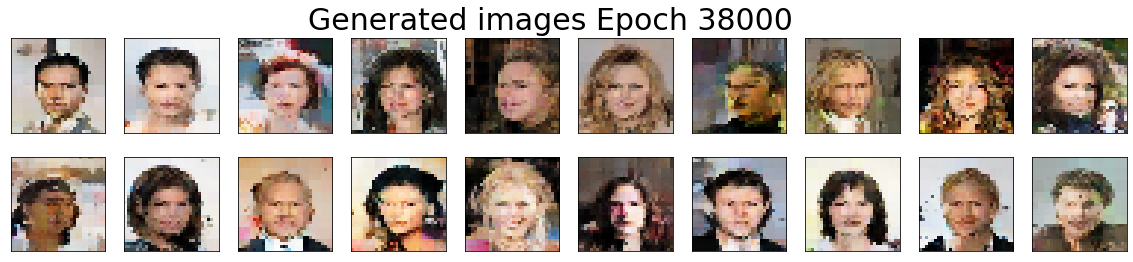

====
Epoch 38100 [D loss: 0.526868462562561, acc.: 71.09375%] [G loss: [1.2567006, 0.09667969]]
====
Epoch 38200 [D loss: 0.4983287751674652, acc.: 75.87890625%] [G loss: [1.2742667, 0.10546875]]
====
Epoch 38300 [D loss: 0.5590741634368896, acc.: 70.60546875%] [G loss: [1.2572298, 0.11621094]]
====
Epoch 38400 [D loss: 0.4973742961883545, acc.: 75.390625%] [G loss: [1.2198572, 0.11035156]]
====
Epoch 38500 [D loss: 0.48900729417800903, acc.: 76.66015625%] [G loss: [1.237293, 0.115234375]]
====
Epoch 38600 [D loss: 0.5345934629440308, acc.: 72.265625%] [G loss: [1.2481948, 0.10644531]]
====
Epoch 38700 [D loss: 0.5097471475601196, acc.: 74.70703125%] [G loss: [1.2243071, 0.13378906]]
====
Epoch 38800 [D loss: 0.5337020754814148, acc.: 72.265625%] [G loss: [1.2756574, 0.09863281]]
====
Epoch 38900 [D loss: 0.5071989297866821, acc.: 75.0%] [G loss: [1.2344345, 0.12011719]]
====
Epoch 39000 [D loss: 0.5355969667434692, acc.: 71.77734375%] [G loss: [1.2675021, 0.115234375]]


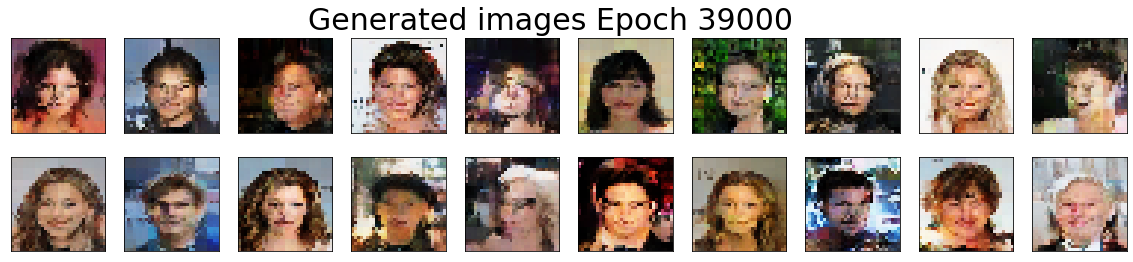

====
Epoch 39100 [D loss: 0.5211557745933533, acc.: 73.6328125%] [G loss: [1.2479478, 0.123046875]]
====
Epoch 39200 [D loss: 0.5128833055496216, acc.: 72.8515625%] [G loss: [1.3195809, 0.119140625]]
====
Epoch 39300 [D loss: 0.5232375860214233, acc.: 72.0703125%] [G loss: [1.3025897, 0.10253906]]
====
Epoch 39400 [D loss: 0.4804069399833679, acc.: 76.66015625%] [G loss: [1.3057766, 0.095703125]]
====
Epoch 39500 [D loss: 0.510616660118103, acc.: 73.73046875%] [G loss: [1.278488, 0.08886719]]
====
Epoch 39600 [D loss: 0.5220946073532104, acc.: 74.609375%] [G loss: [1.2628416, 0.12597656]]
====
Epoch 39700 [D loss: 0.5161116123199463, acc.: 74.609375%] [G loss: [1.258555, 0.103515625]]
====
Epoch 39800 [D loss: 0.5042688250541687, acc.: 75.48828125%] [G loss: [1.2502693, 0.11328125]]
====
Epoch 39900 [D loss: 0.5064741373062134, acc.: 74.51171875%] [G loss: [1.3240507, 0.095703125]]
====
Epoch 40000 [D loss: 0.5156149864196777, acc.: 72.75390625%] [G loss: [1.27056, 0.12597656]]


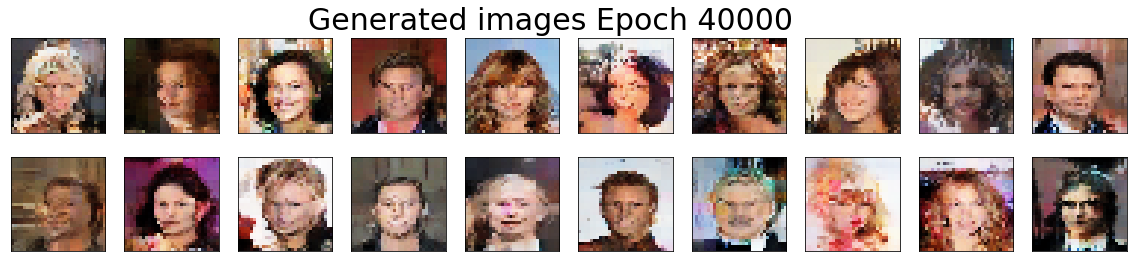

====
Epoch 40100 [D loss: 0.5054256319999695, acc.: 74.4140625%] [G loss: [1.2523009, 0.11035156]]
====
Epoch 40200 [D loss: 0.5267860889434814, acc.: 72.16796875%] [G loss: [1.2300813, 0.12402344]]
====
Epoch 40300 [D loss: 0.48511964082717896, acc.: 75.9765625%] [G loss: [1.2822262, 0.10253906]]
====
Epoch 40400 [D loss: 0.5223965644836426, acc.: 73.046875%] [G loss: [1.267926, 0.11230469]]
====
Epoch 40500 [D loss: 0.5170563459396362, acc.: 71.09375%] [G loss: [1.2654346, 0.115234375]]
====
Epoch 40600 [D loss: 0.4871979057788849, acc.: 75.87890625%] [G loss: [1.3043667, 0.11230469]]
====
Epoch 40700 [D loss: 0.501713752746582, acc.: 74.51171875%] [G loss: [1.2763906, 0.10058594]]
====
Epoch 40800 [D loss: 0.5019272565841675, acc.: 75.29296875%] [G loss: [1.2886703, 0.12011719]]
====
Epoch 40900 [D loss: 0.5282912254333496, acc.: 72.55859375%] [G loss: [1.2842758, 0.10644531]]
====
Epoch 41000 [D loss: 0.5105223059654236, acc.: 75.87890625%] [G loss: [1.2871919, 0.099609375]]


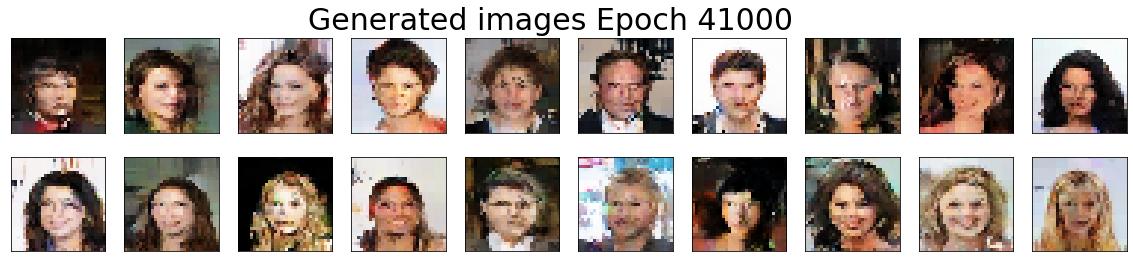

====
Epoch 41100 [D loss: 0.5179065465927124, acc.: 74.70703125%] [G loss: [1.2390043, 0.12695312]]
====
Epoch 41200 [D loss: 0.516141951084137, acc.: 72.8515625%] [G loss: [1.3195171, 0.09765625]]
====
Epoch 41300 [D loss: 0.5273371934890747, acc.: 72.65625%] [G loss: [1.2815087, 0.12792969]]
====
Epoch 41400 [D loss: 0.4778178036212921, acc.: 76.171875%] [G loss: [1.2902955, 0.10839844]]
====
Epoch 41500 [D loss: 0.5142757892608643, acc.: 73.828125%] [G loss: [1.2960612, 0.11621094]]
====
Epoch 41600 [D loss: 0.48217064142227173, acc.: 76.171875%] [G loss: [1.3381534, 0.09765625]]
====
Epoch 41700 [D loss: 0.5021539330482483, acc.: 74.8046875%] [G loss: [1.2805524, 0.12207031]]
====
Epoch 41800 [D loss: 0.5079253911972046, acc.: 74.0234375%] [G loss: [1.2912221, 0.119140625]]
====
Epoch 41900 [D loss: 0.49797073006629944, acc.: 74.21875%] [G loss: [1.3089892, 0.125]]
====
Epoch 42000 [D loss: 0.4841740131378174, acc.: 77.34375%] [G loss: [1.2920492, 0.13671875]]


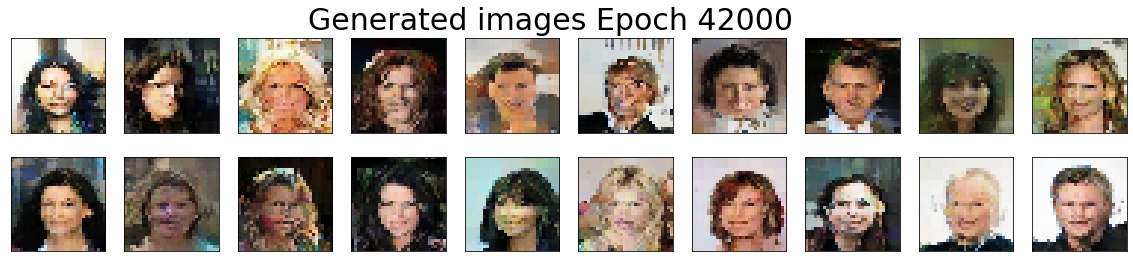

====
Epoch 42100 [D loss: 0.5224589705467224, acc.: 73.73046875%] [G loss: [1.3089169, 0.11425781]]
====
Epoch 42200 [D loss: 0.5146377086639404, acc.: 74.12109375%] [G loss: [1.3018167, 0.1015625]]
====
Epoch 42300 [D loss: 0.48527607321739197, acc.: 76.953125%] [G loss: [1.3381546, 0.08691406]]
====
Epoch 42400 [D loss: 0.5018045902252197, acc.: 75.390625%] [G loss: [1.3569552, 0.1015625]]
====
Epoch 42500 [D loss: 0.5100128054618835, acc.: 73.828125%] [G loss: [1.3264048, 0.1171875]]
====
Epoch 42600 [D loss: 0.513088583946228, acc.: 73.53515625%] [G loss: [1.2702711, 0.13769531]]
====
Epoch 42700 [D loss: 0.5211293697357178, acc.: 74.0234375%] [G loss: [1.2809342, 0.1171875]]
====
Epoch 42800 [D loss: 0.4942764341831207, acc.: 76.26953125%] [G loss: [1.342277, 0.09863281]]
====
Epoch 42900 [D loss: 0.4944477081298828, acc.: 75.09765625%] [G loss: [1.2920963, 0.10644531]]
====
Epoch 43000 [D loss: 0.49713242053985596, acc.: 74.21875%] [G loss: [1.3273333, 0.09472656]]


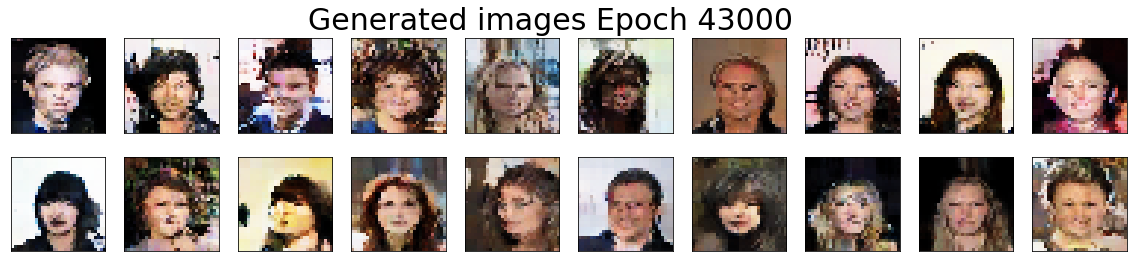

====
Epoch 43100 [D loss: 0.48478269577026367, acc.: 77.9296875%] [G loss: [1.333614, 0.10546875]]
====
Epoch 43200 [D loss: 0.4765995740890503, acc.: 77.05078125%] [G loss: [1.3642807, 0.11035156]]
====
Epoch 43300 [D loss: 0.5434538125991821, acc.: 71.19140625%] [G loss: [1.2808491, 0.13378906]]
====
Epoch 43400 [D loss: 0.5136483907699585, acc.: 73.14453125%] [G loss: [1.3407416, 0.119140625]]
====
Epoch 43500 [D loss: 0.5009011626243591, acc.: 74.21875%] [G loss: [1.3427682, 0.10253906]]
====
Epoch 43600 [D loss: 0.481161892414093, acc.: 76.46484375%] [G loss: [1.3587517, 0.09472656]]
====
Epoch 43700 [D loss: 0.4974724352359772, acc.: 75.48828125%] [G loss: [1.3294306, 0.12207031]]
====
Epoch 43800 [D loss: 0.47539156675338745, acc.: 76.46484375%] [G loss: [1.345959, 0.08691406]]
====
Epoch 43900 [D loss: 0.4812525510787964, acc.: 75.87890625%] [G loss: [1.3274281, 0.11035156]]
====
Epoch 44000 [D loss: 0.49116891622543335, acc.: 76.26953125%] [G loss: [1.3439935, 0.1015625]]


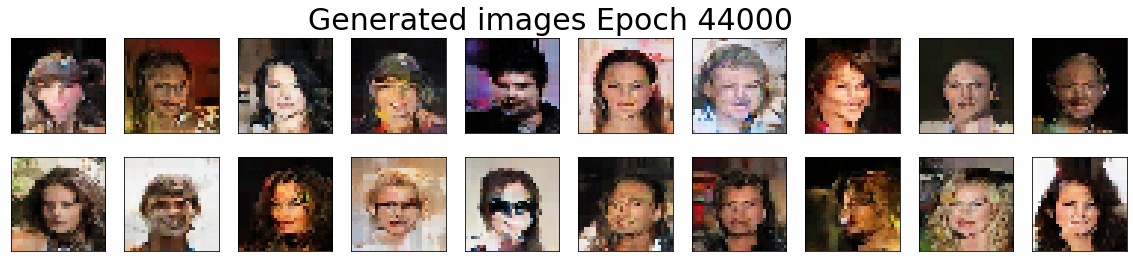

====
Epoch 44100 [D loss: 0.5031014084815979, acc.: 74.609375%] [G loss: [1.3689272, 0.10449219]]
====
Epoch 44200 [D loss: 0.4887334704399109, acc.: 74.90234375%] [G loss: [1.3257549, 0.109375]]
====
Epoch 44300 [D loss: 0.4787326455116272, acc.: 77.05078125%] [G loss: [1.3716192, 0.08984375]]
====
Epoch 44400 [D loss: 0.5022329688072205, acc.: 74.8046875%] [G loss: [1.3802481, 0.09277344]]
====
Epoch 44500 [D loss: 0.48305556178092957, acc.: 75.78125%] [G loss: [1.3602246, 0.11621094]]
====
Epoch 44600 [D loss: 0.522707998752594, acc.: 73.046875%] [G loss: [1.383691, 0.09277344]]
====
Epoch 44700 [D loss: 0.4680812954902649, acc.: 77.63671875%] [G loss: [1.3368661, 0.11035156]]
====
Epoch 44800 [D loss: 0.48484182357788086, acc.: 76.3671875%] [G loss: [1.3573221, 0.10546875]]
====
Epoch 44900 [D loss: 0.478877454996109, acc.: 76.66015625%] [G loss: [1.3547026, 0.1015625]]
====
Epoch 45000 [D loss: 0.48215949535369873, acc.: 76.5625%] [G loss: [1.3960625, 0.1015625]]


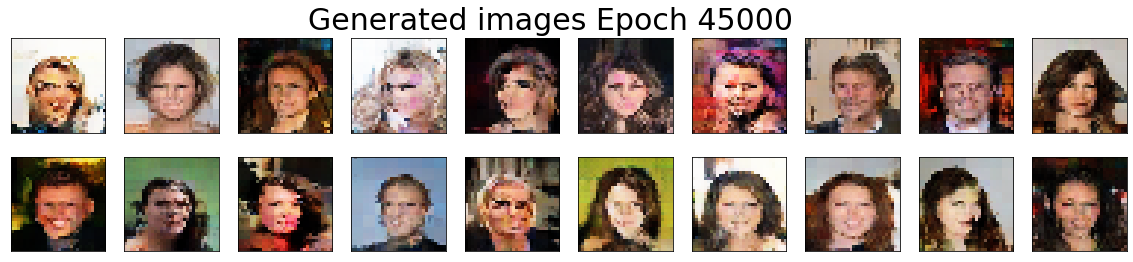

====
Epoch 45100 [D loss: 0.4856575131416321, acc.: 75.68359375%] [G loss: [1.3531404, 0.09667969]]
====
Epoch 45200 [D loss: 0.5077605247497559, acc.: 73.92578125%] [G loss: [1.3867469, 0.08984375]]
====
Epoch 45300 [D loss: 0.4880121648311615, acc.: 75.68359375%] [G loss: [1.33937, 0.115234375]]
====
Epoch 45400 [D loss: 0.502790093421936, acc.: 75.09765625%] [G loss: [1.4187886, 0.07421875]]
====
Epoch 45500 [D loss: 0.47488343715667725, acc.: 75.1953125%] [G loss: [1.3601512, 0.115234375]]
====
Epoch 45600 [D loss: 0.5003805160522461, acc.: 75.9765625%] [G loss: [1.4134411, 0.103515625]]
====
Epoch 45700 [D loss: 0.4964301884174347, acc.: 74.90234375%] [G loss: [1.3750796, 0.09082031]]
====
Epoch 45800 [D loss: 0.47416067123413086, acc.: 77.44140625%] [G loss: [1.4105685, 0.103515625]]
====
Epoch 45900 [D loss: 0.4938299357891083, acc.: 74.70703125%] [G loss: [1.4079498, 0.111328125]]
====
Epoch 46000 [D loss: 0.4843193590641022, acc.: 76.26953125%] [G loss: [1.3877931, 0.09472656]

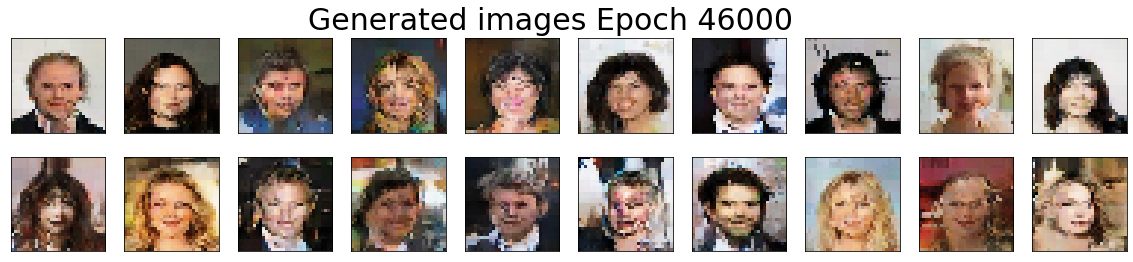

====
Epoch 46100 [D loss: 0.45508596301078796, acc.: 77.5390625%] [G loss: [1.3788068, 0.11816406]]
====
Epoch 46200 [D loss: 0.4702046513557434, acc.: 76.7578125%] [G loss: [1.3892145, 0.10253906]]
====
Epoch 46300 [D loss: 0.47791004180908203, acc.: 77.1484375%] [G loss: [1.4420835, 0.08984375]]
====
Epoch 46400 [D loss: 0.4916641414165497, acc.: 75.68359375%] [G loss: [1.3583012, 0.10644531]]
====
Epoch 46500 [D loss: 0.45968639850616455, acc.: 77.9296875%] [G loss: [1.3814155, 0.11328125]]
====
Epoch 46600 [D loss: 0.483550488948822, acc.: 76.26953125%] [G loss: [1.3822138, 0.11035156]]
====
Epoch 46700 [D loss: 0.4623773694038391, acc.: 76.3671875%] [G loss: [1.3765907, 0.08984375]]
====
Epoch 46800 [D loss: 0.46349388360977173, acc.: 77.05078125%] [G loss: [1.3937168, 0.11425781]]
====
Epoch 46900 [D loss: 0.47023487091064453, acc.: 76.953125%] [G loss: [1.4131078, 0.10644531]]
====
Epoch 47000 [D loss: 0.4595048427581787, acc.: 78.02734375%] [G loss: [1.3620635, 0.107421875]]


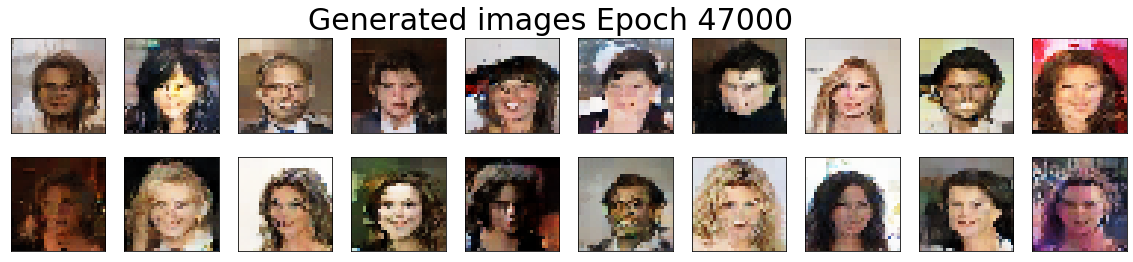

====
Epoch 47100 [D loss: 0.5029690265655518, acc.: 74.90234375%] [G loss: [1.3942771, 0.1015625]]
====
Epoch 47200 [D loss: 0.47739046812057495, acc.: 75.78125%] [G loss: [1.3219748, 0.13476562]]
====
Epoch 47300 [D loss: 0.4601483941078186, acc.: 77.24609375%] [G loss: [1.4267062, 0.078125]]
====
Epoch 47400 [D loss: 0.4666212201118469, acc.: 77.34375%] [G loss: [1.4561222, 0.10546875]]
====
Epoch 47500 [D loss: 0.4918716251850128, acc.: 75.390625%] [G loss: [1.4254622, 0.103515625]]
====
Epoch 47600 [D loss: 0.4842522144317627, acc.: 77.24609375%] [G loss: [1.4098895, 0.107421875]]
====
Epoch 47700 [D loss: 0.4873354434967041, acc.: 75.78125%] [G loss: [1.4119871, 0.09765625]]
====
Epoch 47800 [D loss: 0.47228384017944336, acc.: 77.34375%] [G loss: [1.4240263, 0.091796875]]
====
Epoch 47900 [D loss: 0.5076403021812439, acc.: 73.73046875%] [G loss: [1.4067115, 0.11425781]]
====
Epoch 48000 [D loss: 0.49790143966674805, acc.: 75.29296875%] [G loss: [1.4001136, 0.10839844]]


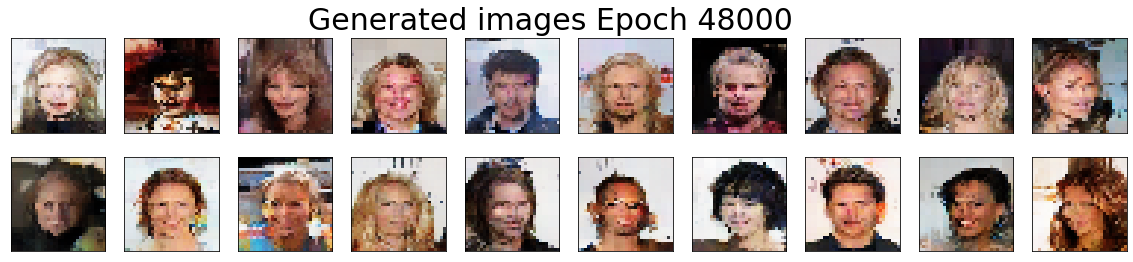

====
Epoch 48100 [D loss: 0.4488596022129059, acc.: 77.83203125%] [G loss: [1.3885123, 0.11816406]]
====
Epoch 48200 [D loss: 0.4623934030532837, acc.: 77.63671875%] [G loss: [1.4434148, 0.10644531]]
====
Epoch 48300 [D loss: 0.47060638666152954, acc.: 76.3671875%] [G loss: [1.435386, 0.08886719]]
====
Epoch 48400 [D loss: 0.46300870180130005, acc.: 78.22265625%] [G loss: [1.4719899, 0.0859375]]
====
Epoch 48500 [D loss: 0.49698150157928467, acc.: 75.87890625%] [G loss: [1.4852456, 0.08300781]]
====
Epoch 48600 [D loss: 0.45961713790893555, acc.: 77.5390625%] [G loss: [1.4438136, 0.08886719]]
====
Epoch 48700 [D loss: 0.439189612865448, acc.: 79.1015625%] [G loss: [1.405078, 0.119140625]]
====
Epoch 48800 [D loss: 0.4681491255760193, acc.: 77.1484375%] [G loss: [1.4488343, 0.10546875]]
====
Epoch 48900 [D loss: 0.4808933734893799, acc.: 77.44140625%] [G loss: [1.4628603, 0.07519531]]
====
Epoch 49000 [D loss: 0.46592122316360474, acc.: 77.05078125%] [G loss: [1.4067122, 0.109375]]


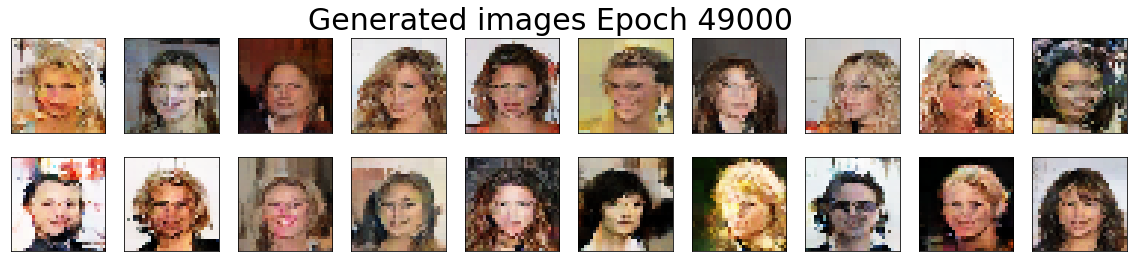

====
Epoch 49100 [D loss: 0.4910263121128082, acc.: 76.66015625%] [G loss: [1.4053906, 0.12207031]]
====
Epoch 49200 [D loss: 0.4852551817893982, acc.: 76.07421875%] [G loss: [1.3698525, 0.12792969]]
====
Epoch 49300 [D loss: 0.47513121366500854, acc.: 76.07421875%] [G loss: [1.4383206, 0.1015625]]
====
Epoch 49400 [D loss: 0.4608951807022095, acc.: 77.5390625%] [G loss: [1.3849998, 0.12792969]]
====
Epoch 49500 [D loss: 0.4604652523994446, acc.: 78.22265625%] [G loss: [1.509334, 0.07128906]]
====
Epoch 49600 [D loss: 0.48464369773864746, acc.: 76.26953125%] [G loss: [1.4729667, 0.09863281]]
====
Epoch 49700 [D loss: 0.4739231467247009, acc.: 76.7578125%] [G loss: [1.387725, 0.10449219]]
====
Epoch 49800 [D loss: 0.44952553510665894, acc.: 77.34375%] [G loss: [1.4352384, 0.087890625]]
====
Epoch 49900 [D loss: 0.4637250602245331, acc.: 77.83203125%] [G loss: [1.4341836, 0.10253906]]
----------
Time took: 173.54 min


In [19]:
dir_result="/home/xwang/Code/Machine_Learning/Ass3/GAN_celeba/Submission_Expirement_Result"

try:
    os.mkdir(dir_result)
except:
    pass
    
start_time = time.time()

models = adversarial_model, discriminator, generator          
#noise_batch_size = 128
history,discriminator_losses, adversarial_losses, sample_images = train(models, X_train,dir_result,epochs=50000, batch_size=128*8)
end_time = time.time()
print("-"*10)
print("Time took: {:4.2f} min".format((end_time - start_time)/60))

## **Save model**

In [20]:
#combined, discriminator, generator
adversarial_model.save('/home/xwang/Code/Machine_Learning/Ass3/GAN_celeba/Submission_Expirement_Result/GAN_model/adversarial_model_submission_50000.h5')
discriminator.save('/home/xwang/Code/Machine_Learning/Ass3/GAN_celeba/Submission_Expirement_Result/GAN_model/discriminator_submission_50000.h5')
generator.save('/home/xwang/Code/Machine_Learning/Ass3/GAN_celeba/Submission_Expirement_Result/GAN_model/generator_submission_50000.h5')

## **Plot Evolution of Generated Images (Ones)**

In [21]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}



<IPython.core.display.Javascript object>

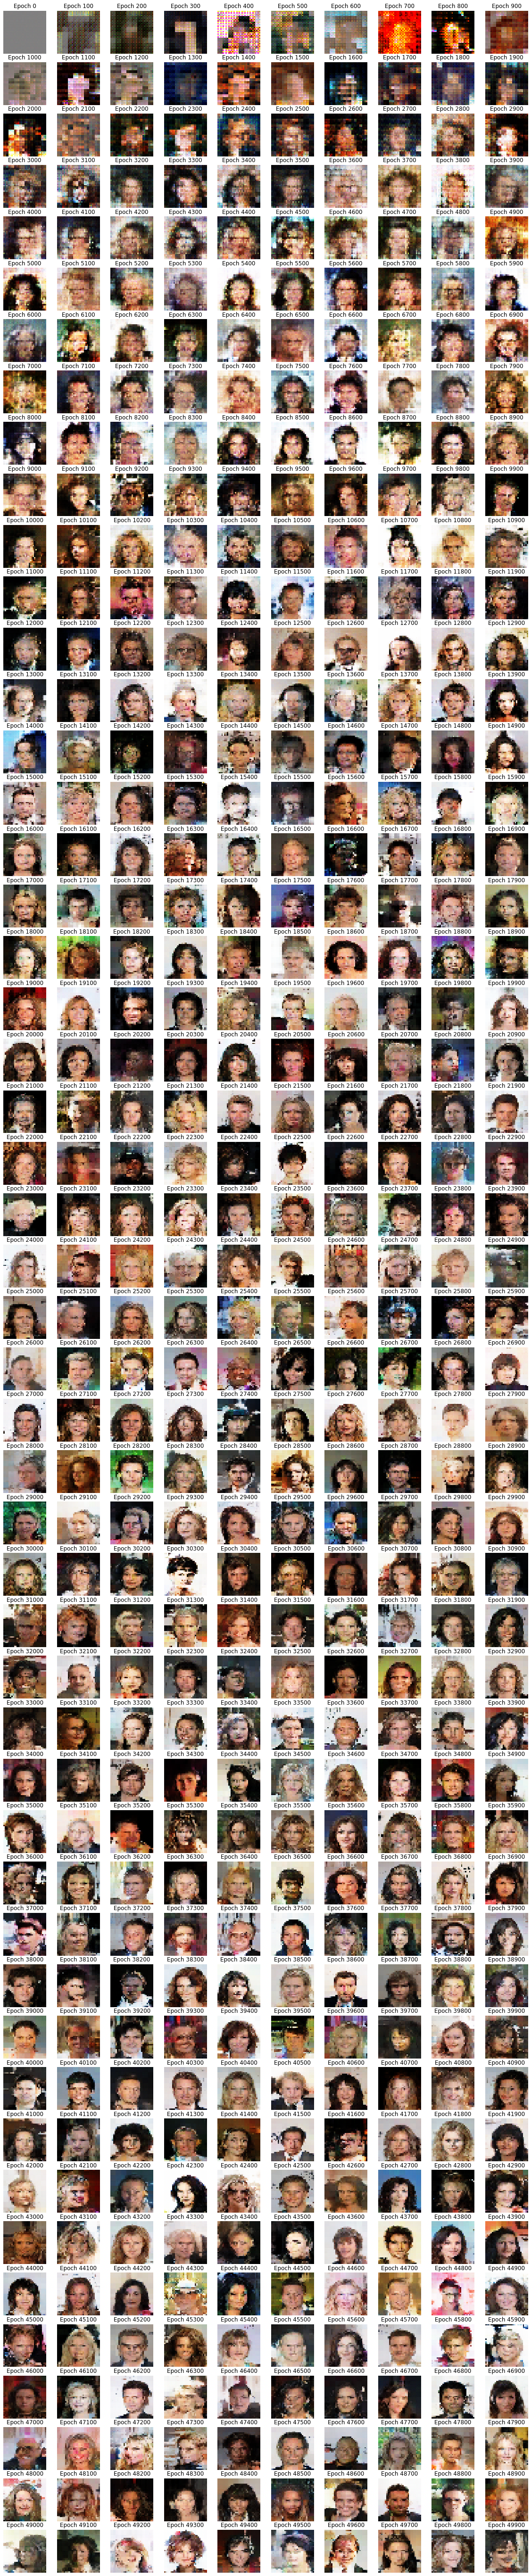

In [22]:
plt.figure(figsize=(20,100))
for epoch, fake_image in enumerate(sample_images, 0):
    plt.subplot(50, 10, epoch+1)
    plt.imshow(fake_image)
    plt.title("Epoch %d" % (epoch * 100)) 
    plt.axis('off')


    

## **Plot Training History**

Text(0.5, 1.0, 'Adversarial Accuracy')

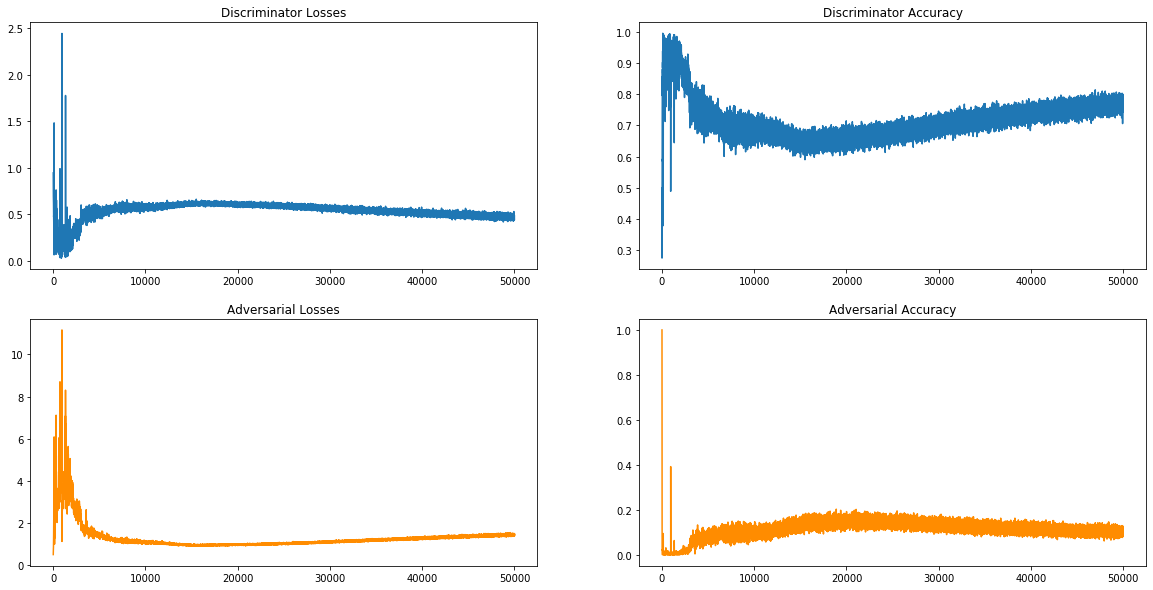

In [23]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.plot(np.array(discriminator_losses)[:, 0])
plt.title("Discriminator Losses")

plt.subplot(2,2,2)
plt.plot(np.array(discriminator_losses)[:, 1])
plt.title("Discriminator Accuracy")

plt.subplot(2,2,3)
plt.plot(np.array(adversarial_losses)[:, 0], color='darkorange')
plt.title("Adversarial Losses")

plt.subplot(2,2,4)
plt.plot(np.array(adversarial_losses)[:, 1], color='darkorange')
plt.title("Adversarial Accuracy")

In [26]:
print(noise.shape)

(20, 100)


## **Generating Images**

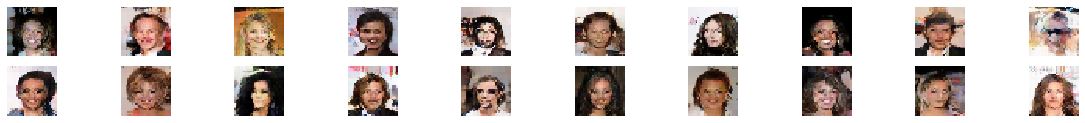

In [24]:
#noise = np.random.uniform(-1.0, 1.0, size=[30, 100])
noise = get_noise(noise_sample=nsample, nlatent_dim=z_dim)

fake_images = generator.predict(noise)

plt.figure(figsize=(20,2))
for epoch, fake_image in enumerate(fake_images, 1):
    plt.subplot(2, 10, epoch)
    plt.imshow(fake_image)
    plt.axis('off')

In [28]:
#dir_result = '/home/xwang/Code/Machine_Learning/Ass3/GAN_celeba/Submission_Expirement_Result'
dir_result = '/home/xwang/Code/Machine_Learning/Ass3/GAN_celeba/Submission_Expirement_Result/GAN_model'
def makegif(dir_result):
    import imageio
    filenames = np.sort(os.listdir(dir_result))
    filenames = [ fnm for fnm in filenames if ".png" in fnm]

    with imageio.get_writer(dir_result + '/image.gif', mode='I') as writer:
        for filename in filenames:
            image = imageio.imread(dir_result + filename)
            writer.append_data(image)
            os.remove(dir_result + filename)
            
makegif(dir_result)

In [ ]:
# from keras.models import load_model
# adversarial_model = load_model('/home/xwang/Code/Machine_Learning/Ass3/GAN_celeba/GAN_model/adversarial_model_20000.h5')
# discriminator = load_model('/home/xwang/Code/Machine_Learning/Ass3/GAN_celeba/GAN_model/discriminator_20000.h5')
# generator = load_model('/home/xwang/Code/Machine_Learning/Ass3/GAN_celeba/GAN_model/generator_20000.h5')


In [ ]:
import pandas as pd 
hist = pd.DataFrame(history)
plt.figure(figsize=(20,5))
for colnm in hist.columns:
    plt.plot(hist[colnm],label=colnm)
plt.legend()
plt.ylabel("loss")
plt.xlabel("epochs")
plt.show()
